# **WorldQuant University Capstone for MScFE 690 (Group 9184)**

## Data Extraction. Data Transformation. Methodology Description. Reinforcement Learning. Traditional Approaches. Model Development. Performance Comparison and Analysis. DynaCAAST Framework.


<br><br>


|**DynaCAAST framework for RL based trading agents**| |
|:---|:---|
|**TEAM MEMBER 1** | Farai Masunda  |
|**TEAM MEMBER 2**  |      Bhaskar Vedula  |


<hr style='border:4px solid black'>

<hr style='border:2px solid black'>

## **Section 7: Training and testing of traditional and RL agents (Part 3)**


In this section, we train and test all our approaches/agents with the training and testing data that we had created earlier.

## **Q. A2C RL Model with LSTM predictions as the state of the RL agent**

In [ ]:
stock_dimension = len(tickers)
state_space = stock_dimension

In [ ]:
env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": lstm_fcst,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

In [ ]:
e_train_gym = StockPortfolioEnv(df = train_data_lstm, **env_kwargs)

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

In [ ]:
# initialize
agent = DRLAgent(env = env_train)
model_a2c_lstm = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS_LSTM)


{'n_steps': 500, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [ ]:
trained_a2c_lstm = agent.train_model(model=model_a2c_lstm, tb_log_name='a2c', total_timesteps=total_timesteps_)
DynaCAAST_Model['a2c_lstm'] = trained_a2c_lstm

In [ ]:
import time
# A2C Train Model
e_trade_gym = StockPortfolioEnv(df = train_data_lstm, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_train_returns_lstm, _ = DRLAgent.DRL_prediction(model=trained_a2c_lstm, test_data = train_data_lstm, test_env = env_trade, test_obs = obs_trade)

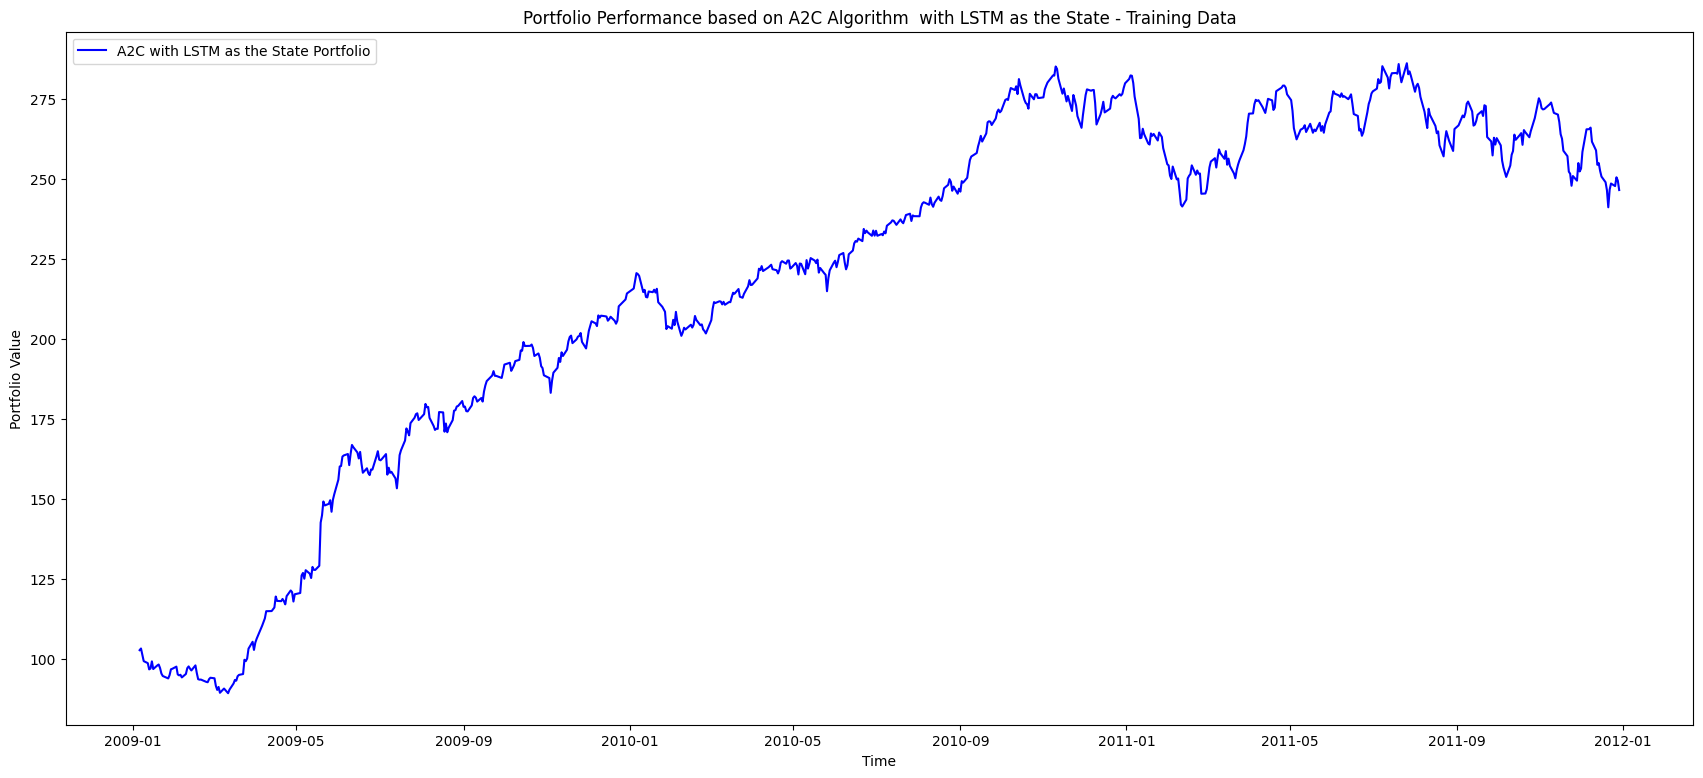

Final Portfolio Value: 246.45
Total Return: 146.45
Annualized Return: 36.13%
Sharpe Ratio: 1.6971
Maximum draw down(%): -15.7233


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(a2c_train_returns_lstm)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = a2c_train_returns_lstm['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="A2C with LSTM as the State Portfolio", color="blue")
plt.title("Portfolio Performance based on A2C Algorithm  with LSTM as the State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_a2c_lstm"] = portfolio_returns

# Calculate performance metrics
final_value_trg_a2c_lstm = capital
total_return_trg_a2c_lstm = final_value_trg_a2c_lstm - initial_capital
sharpe_ratio_trg_a2c_lstm = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_a2c_lstm = (final_value_trg_a2c_lstm / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_a2c_lstm = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_a2c_lstm:.2f}")
print(f"Total Return: {total_return_trg_a2c_lstm:.2f}")
print(f"Annualized Return: {annualized_return_trg_a2c_lstm * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_a2c_lstm:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_a2c_lstm:.4f}")

In [ ]:
# A2C Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_lstm, **env_kwargs)
env_a2c_lstm_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_lstm_test'] = copy.copy(env_a2c_lstm_test)
DynaCAAST_Obs['a2c_lstm_test'] = obs_trade.copy()
a2c_test_returns_lstm, _ = DRLAgent.DRL_prediction(model=trained_a2c_lstm, test_data = test_data_lstm, test_env = env_a2c_lstm_test, test_obs = obs_trade)

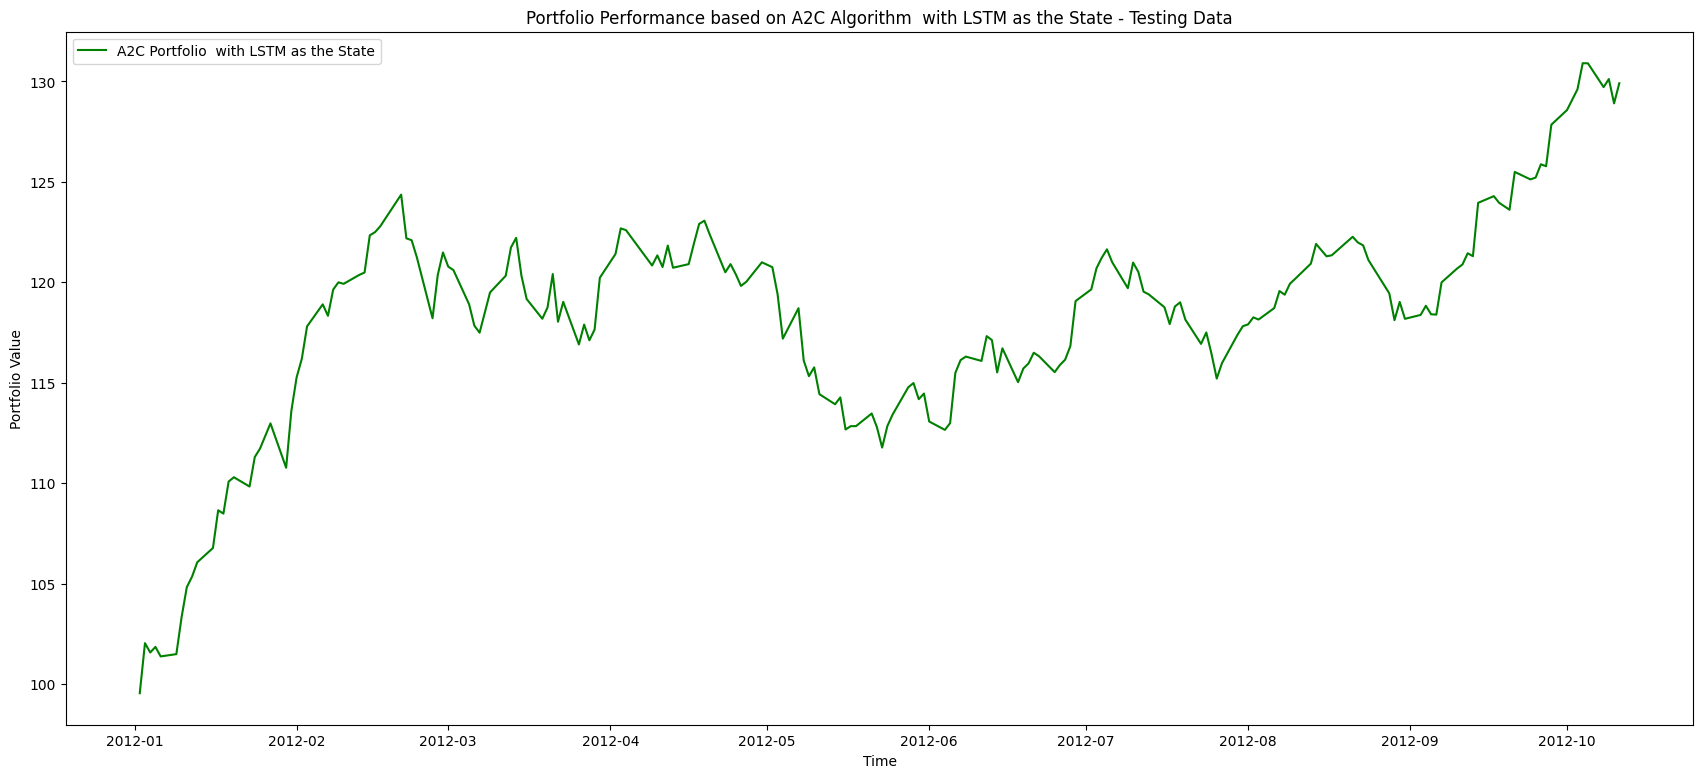

Final Portfolio Value: 129.91
Total Return: 29.91
Annualized Return: 40.24%
Sharpe Ratio : 2.3718
Maximum draw down(%): -10.1229


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(a2c_test_returns_lstm)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = a2c_test_returns_lstm['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(a2c_test_returns_lstm["date"][1:], portfolio_values, label="A2C Portfolio  with LSTM as the State", color="green")
plt.title("Portfolio Performance based on A2C Algorithm  with LSTM as the State - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_a2c_lstm"] = portfolio_returns

# Calculate performance metrics
final_value_test_a2c_lstm = capital
total_return_test_a2c_lstm = final_value_test_a2c_lstm - initial_capital
sharpe_ratio_test_a2c_lstm = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_a2c_lstm = (final_value_test_a2c_lstm / initial_capital) ** (1 / (len(returns_test_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_a2c_lstm = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_a2c_lstm:.2f}")
print(f"Total Return: {total_return_test_a2c_lstm:.2f}")
print(f"Annualized Return: {annualized_return_test_a2c_lstm * 100:.2f}%")
print(f"Sharpe Ratio : {sharpe_ratio_test_a2c_lstm:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_a2c_lstm:.4f}")

## **R. PPO RL Model with LSTM predictions as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)

model_ppo_lstm = agent.get_model("ppo", model_kwargs = PPO_PARAMS_LSTM)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [ ]:
trained_ppo_lstm = agent.train_model(model=model_ppo_lstm, tb_log_name='ppo', total_timesteps=total_timesteps_)
DynaCAAST_Model['ppo_lstm'] = trained_ppo_lstm

-----------------------------
| time/              |      |
|    fps             | 495  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 458       |
|    iterations           | 2         |
|    time_elapsed         | 8         |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -38.3     |
|    explained_variance   | 0         |
|    learning_rate        | 0.0001    |
|    loss                 | 7.72e+14  |
|    n_updates            | 10        |
|    policy_gradient_loss | -8.16e-07 |
|    std                  | 1         |
|    value_loss           | 1.51e+15  |
---------------------------------------
------------------------------

In [ ]:
# PPO Train Model
e_trade_gym = StockPortfolioEnv(df = train_data_lstm, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ppo_train_returns_lstm, _ = DRLAgent.DRL_prediction(model=trained_ppo_lstm, test_data = train_data_lstm, test_env = env_trade, test_obs = obs_trade)

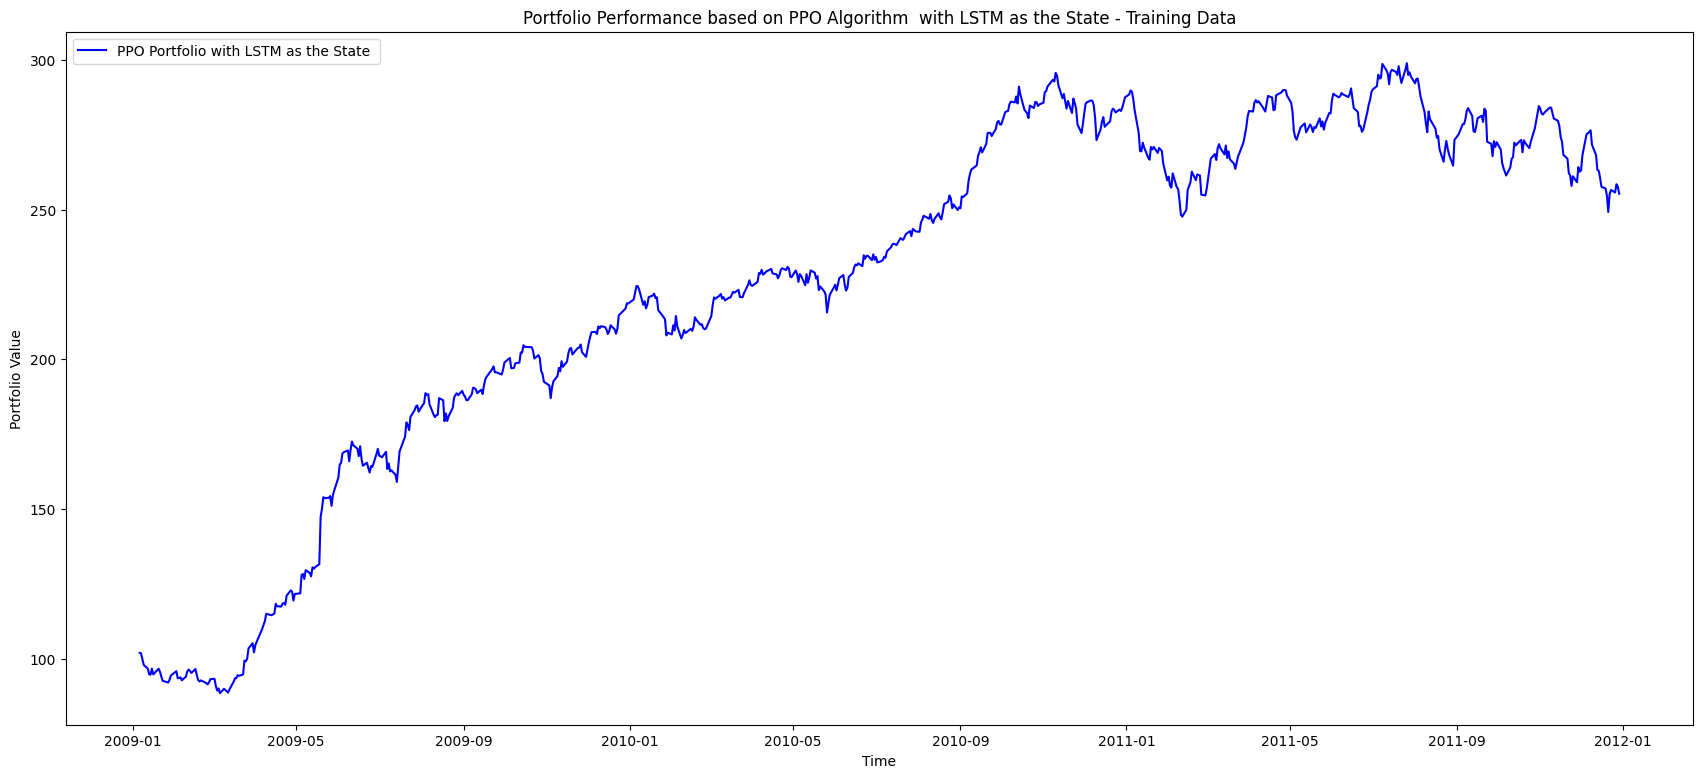

Final Portfolio Value: 255.30
Total Return: 155.30
Annualized Return: 37.78%
Sharpe Ratio: 1.7184
Maximum draw down(%): -16.6179


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ppo_train_returns_lstm)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ppo_train_returns_lstm['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="PPO Portfolio with LSTM as the State ", color="blue")
plt.title("Portfolio Performance based on PPO Algorithm  with LSTM as the State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_ppo_lstm"] = portfolio_returns

# Calculate performance metrics
final_value_trg_ppo_lstm = capital
total_return_trg_ppo_lstm = final_value_trg_ppo_lstm - initial_capital
sharpe_ratio_trg_ppo_lstm = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_ppo_lstm = (final_value_trg_ppo_lstm / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_ppo_lstm = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_ppo_lstm:.2f}")
print(f"Total Return: {total_return_trg_ppo_lstm:.2f}")
print(f"Annualized Return: {annualized_return_trg_ppo_lstm * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_ppo_lstm:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_ppo_lstm:.4f}")

In [ ]:
# PPO Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_lstm, **env_kwargs)
env_ppo_lstm_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_lstm_test'] = copy.copy(env_ppo_lstm_test)
DynaCAAST_Obs['ppo_lstm_test'] = obs_trade.copy()
ppo_test_returns_lstm, _ = DRLAgent.DRL_prediction(model=trained_ppo_lstm, test_data = test_data_lstm, test_env = env_ppo_lstm_test, test_obs = obs_trade)

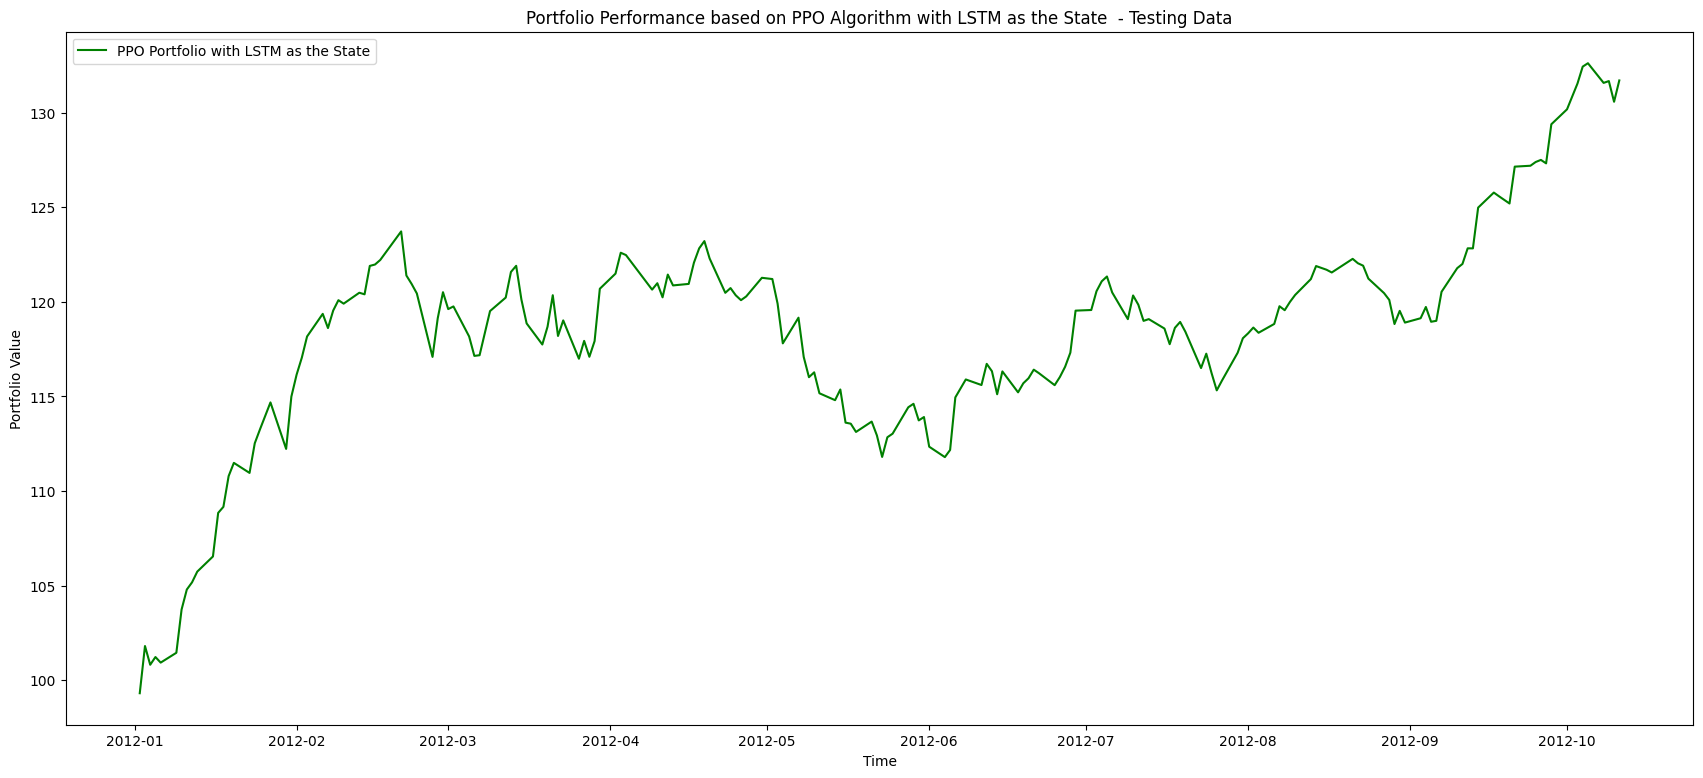

Final Portfolio Value: 131.71
Total Return: 31.71
Annualized Return: 42.75%
Sharpe Ratio: 2.5024
Maximum draw down(%): -9.6446


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ppo_test_returns_lstm)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ppo_test_returns_lstm['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(ppo_test_returns_lstm["date"][1:], portfolio_values, label="PPO Portfolio with LSTM as the State", color="green")
plt.title("Portfolio Performance based on PPO Algorithm with LSTM as the State  - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_ppo_lstm"] = portfolio_returns

# Calculate performance metrics
final_value_test_ppo_lstm = capital
total_return_test_ppo_lstm = final_value_test_ppo_lstm - initial_capital
sharpe_ratio_test_ppo_lstm = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_ppo_lstm = (final_value_test_ppo_lstm / initial_capital) ** (1 / (len(ppo_test_returns_lstm) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_ppo_lstm = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_ppo_lstm:.2f}")
print(f"Total Return: {total_return_test_ppo_lstm:.2f}")
print(f"Annualized Return: {annualized_return_test_ppo_lstm * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_ppo_lstm:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_ppo_lstm:.4f}")

## **S. DDPG RL Model with LSTM predictions as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_ddpg_lstm = agent.get_model("ddpg", model_kwargs = DDPG_PARAMS_LSTM)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_ddpg_lstm = agent.train_model(model= model_ddpg_lstm, tb_log_name='ddpg',  total_timesteps=total_timesteps_)
DynaCAAST_Model['ddpg_lstm'] = trained_ddpg_lstm

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 42       |
|    time_elapsed    | 68       |
|    total_timesteps | 2948     |
| train/             |          |
|    actor_loss      | -2.6e+07 |
|    critic_loss     | 7.48e+10 |
|    learning_rate   | 0.001    |
|    n_updates       | 2847     |
---------------------------------


In [ ]:
# DDPG Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_lstm, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_train_returns_lstm, _ = DRLAgent.DRL_prediction(model=trained_ddpg_lstm, test_data = train_data_lstm, test_env = env_trade, test_obs = obs_trade)

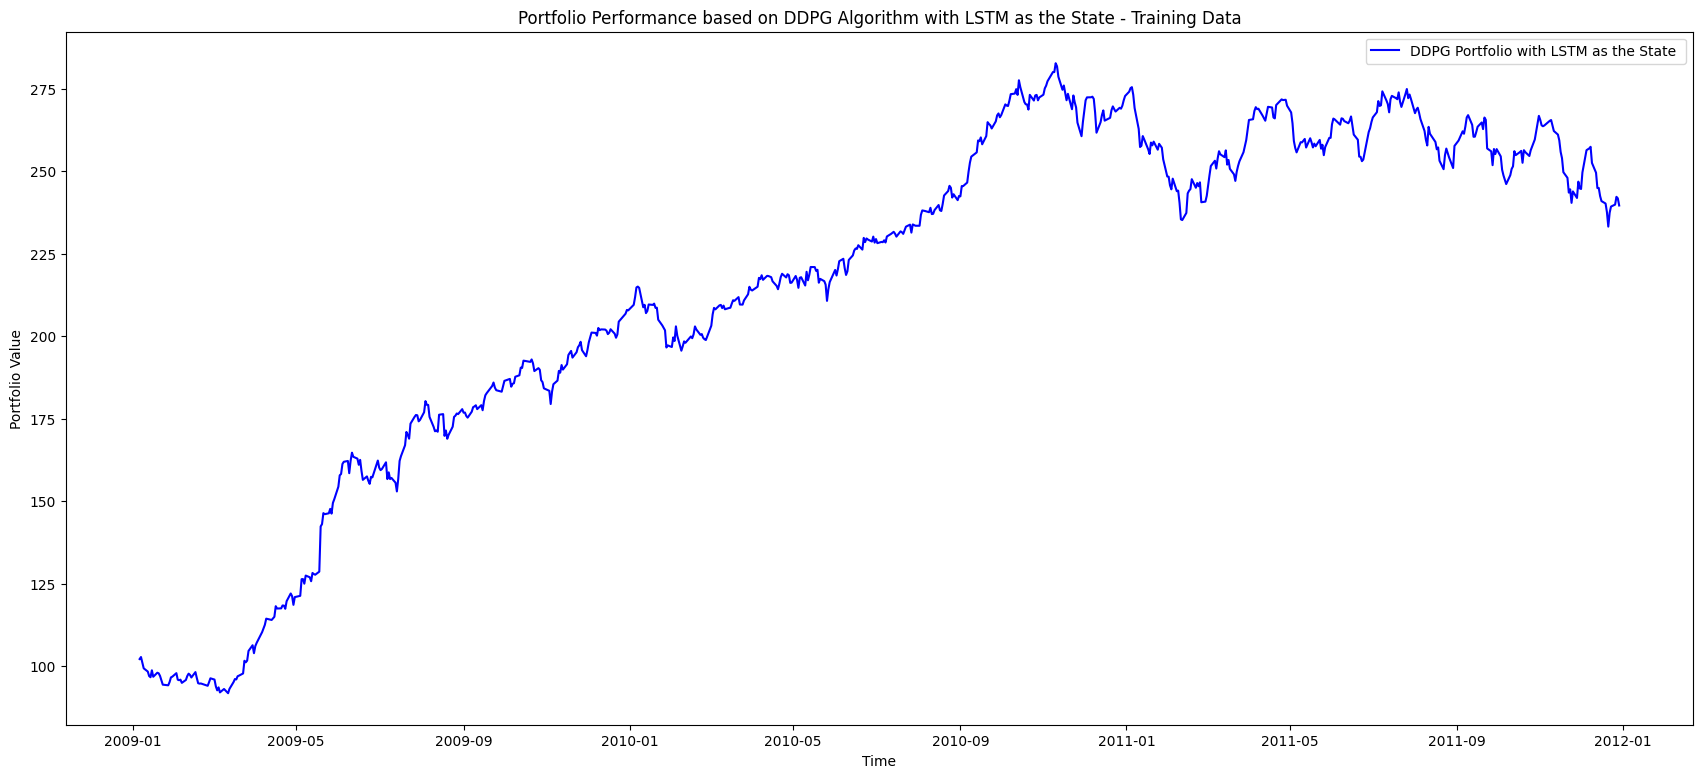

Final Portfolio Value: 239.62
Total Return: 139.62
Annualized Return: 34.82%
Sharpe Ratio: 1.7209
Maximum draw down(%): -16.8069


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ddpg_train_returns_lstm)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ddpg_train_returns_lstm['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="DDPG Portfolio with LSTM as the State ", color="blue")
plt.title("Portfolio Performance based on DDPG Algorithm with LSTM as the State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_ddpg_lstm"] = portfolio_returns

# Calculate performance metrics
final_value_trg_ddpg_lstm = capital
total_return_trg_ddpg_lstm = final_value_trg_ddpg_lstm - initial_capital
sharpe_ratio_trg_ddpg_lstm = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_ddpg_lstm = (final_value_trg_ddpg_lstm / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_ddpg_lstm = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_ddpg_lstm:.2f}")
print(f"Total Return: {total_return_trg_ddpg_lstm:.2f}")
print(f"Annualized Return: {annualized_return_trg_ddpg_lstm * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_ddpg_lstm:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_ddpg_lstm:.4f}")

In [ ]:
# DDPG Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_lstm, **env_kwargs)
env_ddpg_lstm_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_lstm_test'] = copy.copy(env_ddpg_lstm_test)
DynaCAAST_Obs['ddpg_lstm_test'] = obs_trade.copy()
ddpg_test_returns_lstm, _ = DRLAgent.DRL_prediction(model=trained_ddpg_lstm, test_data = test_data_lstm, test_env = env_ddpg_lstm_test, test_obs = obs_trade)

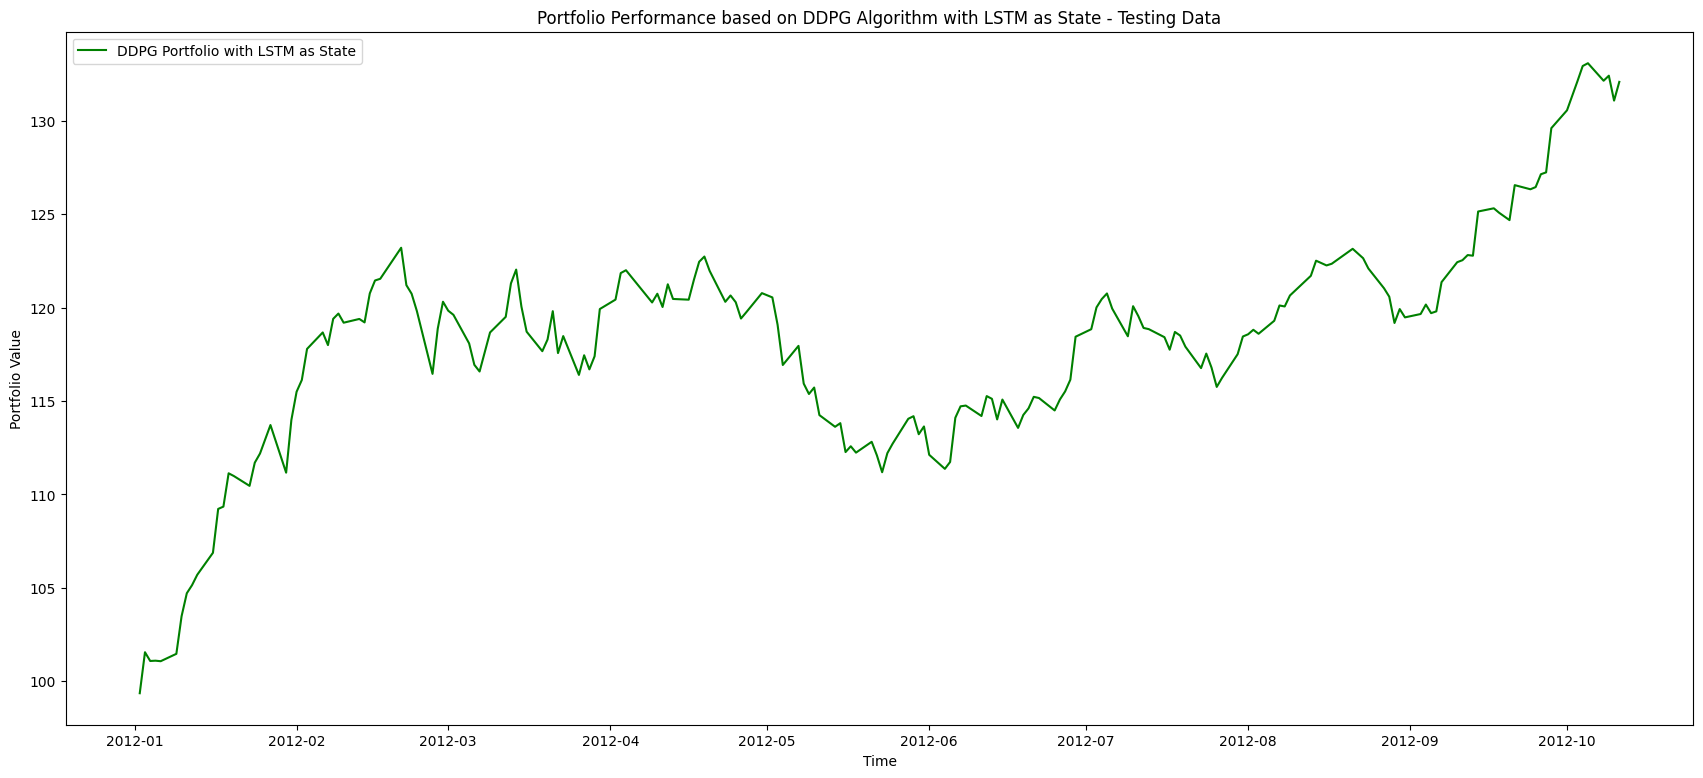

Final Portfolio Value: 132.08
Total Return: 32.08
Annualized Return: 43.27%
Sharpe Ratio: 2.5236
Maximum draw down(%): -9.7505


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ddpg_test_returns_lstm)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ddpg_test_returns_lstm['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(ddpg_test_returns_lstm["date"][1:], portfolio_values, label="DDPG Portfolio with LSTM as State", color="green")
plt.title("Portfolio Performance based on DDPG Algorithm with LSTM as State - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_ddpg_lstm"] = portfolio_returns

# Calculate performance metrics
final_value_test_ddpg_lstm = capital
total_return_test_ddpg_lstm = final_value_test_ddpg_lstm - initial_capital
sharpe_ratio_test_ddpg_lstm = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_ddpg_lstm = (final_value_test_ddpg_lstm / initial_capital) ** (1 / (len(ddpg_test_returns_lstm) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_ddpg_lstm = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_ddpg_lstm:.2f}")
print(f"Total Return: {total_return_test_ddpg_lstm:.2f}")
print(f"Annualized Return: {annualized_return_test_ddpg_lstm * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_ddpg_lstm:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_ddpg_lstm:.4f}")

## **T. SAC RL Model with LSTM predictions as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_sac_lstm = agent.get_model("sac",model_kwargs = SAC_PARAMS_LSTM)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0003, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


In [ ]:
trained_sac_lstm = agent.train_model(model=model_sac_lstm, tb_log_name='sac', total_timesteps=total_timesteps_)
DynaCAAST_Model['sac_lstm'] = trained_sac_lstm

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 37        |
|    time_elapsed    | 78        |
|    total_timesteps | 2948      |
| train/             |           |
|    actor_loss      | -2.46e+07 |
|    critic_loss     | 1.67e+11  |
|    ent_coef        | 0.231     |
|    ent_coef_loss   | 471       |
|    learning_rate   | 0.0003    |
|    n_updates       | 2847      |
----------------------------------


In [ ]:
#  SAC Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_lstm, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

sac_train_returns_lstm, _ = DRLAgent.DRL_prediction(model=trained_sac_lstm, test_data = train_data_lstm, test_env = env_trade, test_obs = obs_trade)

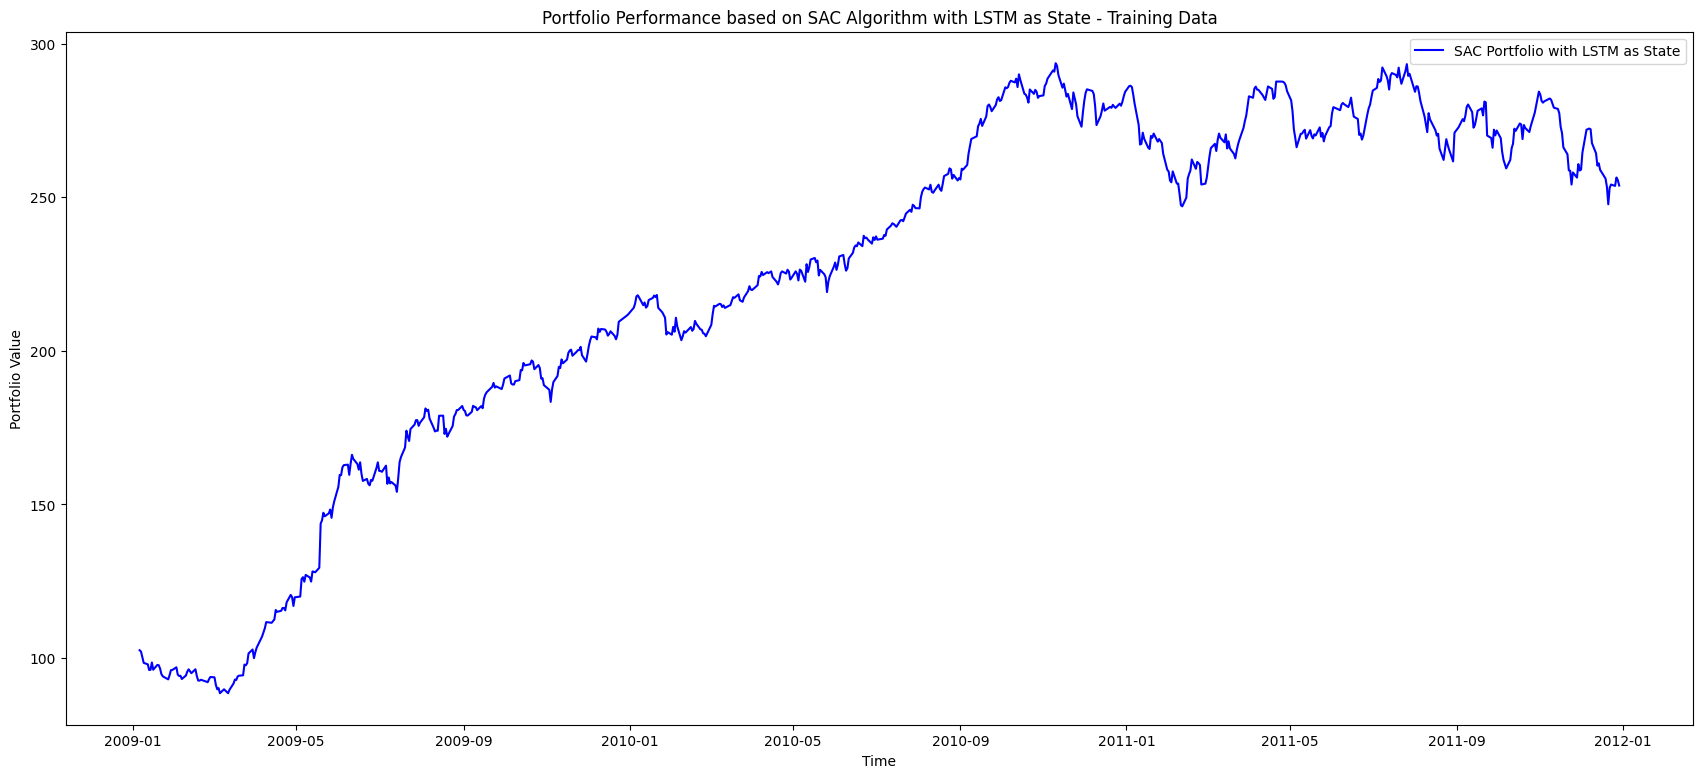

Final Portfolio Value: 253.80
Total Return: 153.80
Annualized Return: 37.50%
Sharpe Ratio Kelly: 1.7636
Maximum draw down(%): -15.8690


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(sac_train_returns_lstm)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = sac_train_returns_lstm['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="SAC Portfolio with LSTM as State", color="blue")
plt.title("Portfolio Performance based on SAC Algorithm with LSTM as State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_sac_lstm"] = portfolio_returns

# Calculate performance metrics
final_value_trg_sac_lstm = capital
total_return_trg_sac_lstm = final_value_trg_sac_lstm - initial_capital
sharpe_ratio_trg_sac_lstm = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_sac_lstm = (final_value_trg_sac_lstm / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_sac_lstm = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_sac_lstm:.2f}")
print(f"Total Return: {total_return_trg_sac_lstm:.2f}")
print(f"Annualized Return: {annualized_return_trg_sac_lstm * 100:.2f}%")
print(f"Sharpe Ratio Kelly: {sharpe_ratio_trg_sac_lstm:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_sac_lstm:.4f}")

In [ ]:
# SAC Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_lstm, **env_kwargs)
env_sac_lstm_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_lstm_test'] = copy.copy(env_sac_lstm_test)
DynaCAAST_Obs['sac_lstm_test'] = obs_trade.copy()
sac_test_returns_lstm, _ = DRLAgent.DRL_prediction(model=trained_sac_lstm, test_data = test_data_lstm, test_env = env_sac_lstm_test, test_obs = obs_trade)

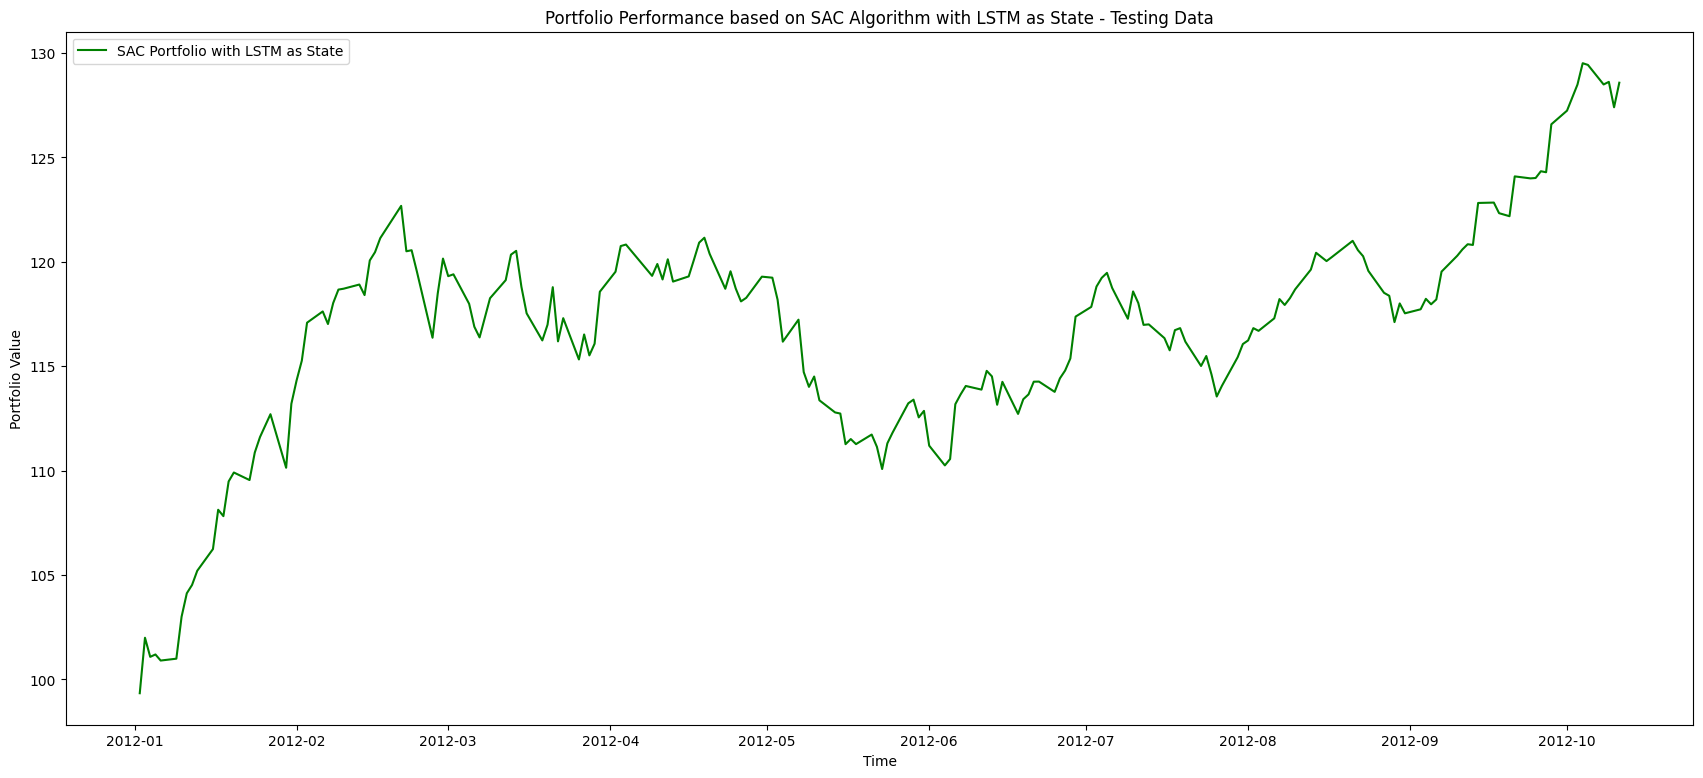

Final Portfolio Value: 128.58
Total Return: 28.58
Annualized Return: 38.38%
Sharpe Ratio: 2.2830
Maximum draw down(%): -10.2740


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(sac_test_returns_lstm)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = sac_test_returns_lstm['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(sac_test_returns_lstm["date"][1:], portfolio_values, label="SAC Portfolio with LSTM as State", color="green")
plt.title("Portfolio Performance based on SAC Algorithm with LSTM as State - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_sac_lstm"] = portfolio_returns

# Calculate performance metrics
final_value_test_sac_lstm = capital
total_return_test_sac_lstm = final_value_test_sac_lstm - initial_capital
sharpe_ratio_test_sac_lstm = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_sac_lstm = (final_value_test_sac_lstm / initial_capital) ** (1 / (len(sac_test_returns_lstm) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_sac_lstm = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_sac_lstm:.2f}")
print(f"Total Return: {total_return_test_sac_lstm:.2f}")
print(f"Annualized Return: {annualized_return_test_sac_lstm * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_sac_lstm:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_sac_lstm:.4f}")

## **U. TD3 RL Model with LSTM predictions as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_td3_lstm = agent.get_model("td3", model_kwargs = TD3_PARAMS_LSTM)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_td3_lstm = agent.train_model(model=model_td3_lstm, tb_log_name='td3', total_timesteps=total_timesteps_)
DynaCAAST_Model['td3_lstm'] = trained_td3_lstm

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 44        |
|    time_elapsed    | 65        |
|    total_timesteps | 2948      |
| train/             |           |
|    actor_loss      | -1.44e+07 |
|    critic_loss     | 5.99e+10  |
|    learning_rate   | 0.001     |
|    n_updates       | 2847      |
----------------------------------


In [ ]:
# td3 Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_lstm, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

td3_train_returns_lstm, _ = DRLAgent.DRL_prediction(model=trained_td3_lstm, test_data = train_data_lstm, test_env = env_trade, test_obs = obs_trade)

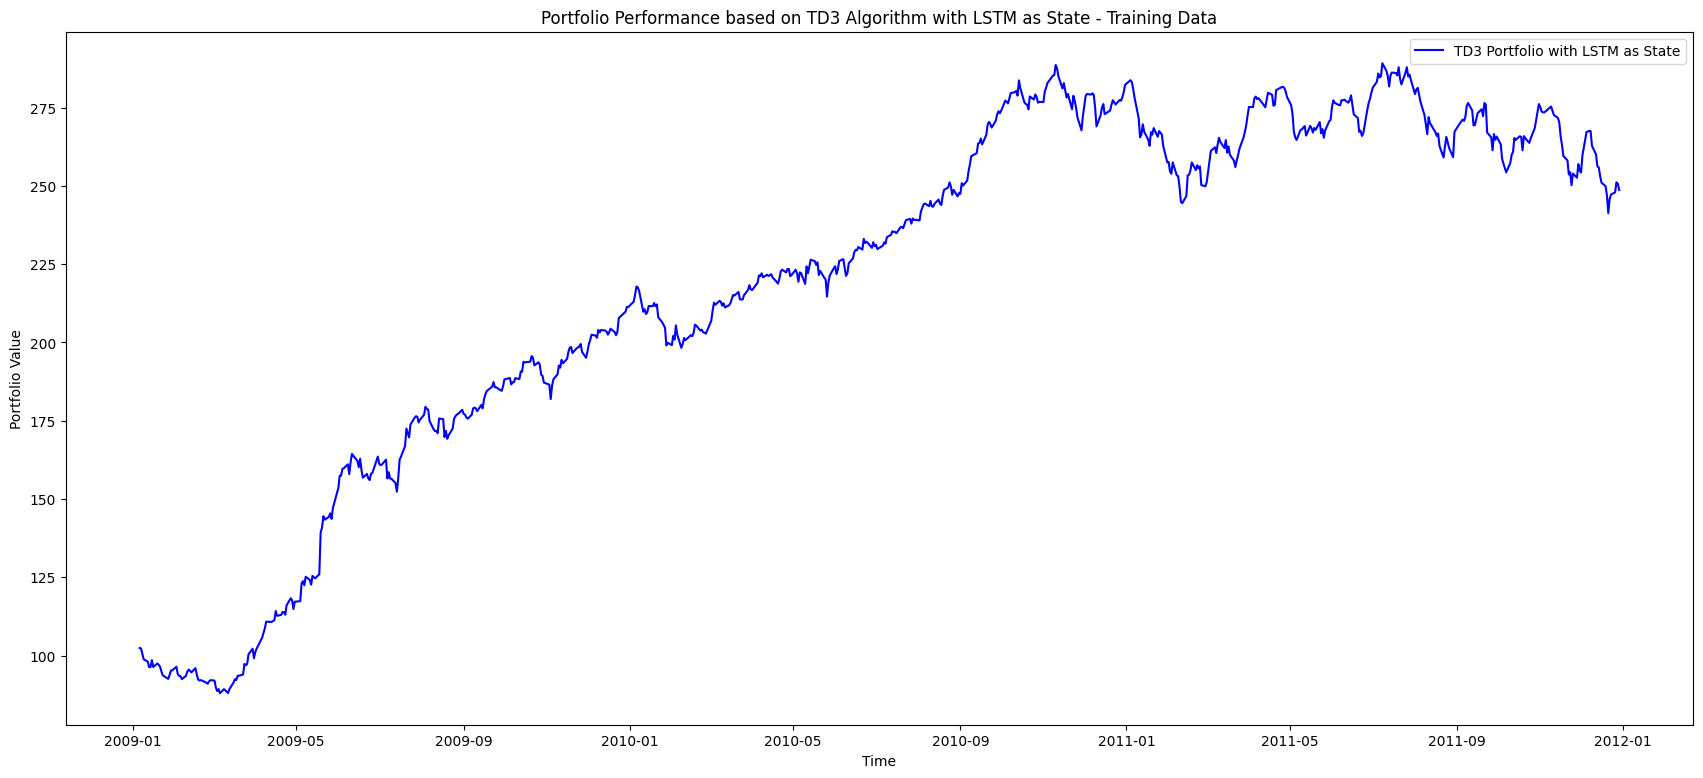

Final Portfolio Value: 248.64
Total Return: 148.64
Annualized Return: 36.54%
Sharpe Ratio: 1.7378
Maximum draw down(%): -16.5606


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(td3_train_returns_lstm)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = td3_train_returns_lstm['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="TD3 Portfolio with LSTM as State", color="blue")
plt.title("Portfolio Performance based on TD3 Algorithm with LSTM as State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_td3_lstm"] = portfolio_returns

# Calculate performance metrics
final_value_trg_td3_lstm = capital
total_return_trg_td3_lstm = final_value_trg_td3_lstm - initial_capital
sharpe_ratio_trg_td3_lstm = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_td3_lstm = (final_value_trg_td3_lstm / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_td3_lstm = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_td3_lstm:.2f}")
print(f"Total Return: {total_return_trg_td3_lstm:.2f}")
print(f"Annualized Return: {annualized_return_trg_td3_lstm * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_td3_lstm:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_td3_lstm:.4f}")

In [ ]:
# TD3 Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_lstm, **env_kwargs)
env_td3_lstm_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_lstm_test'] = copy.copy(env_td3_lstm_test)
DynaCAAST_Obs['td3_lstm_test'] = obs_trade.copy()
td3_test_returns_lstm, _ = DRLAgent.DRL_prediction(model=trained_td3_lstm, test_data = test_data_lstm, test_env = env_td3_lstm_test, test_obs = obs_trade)

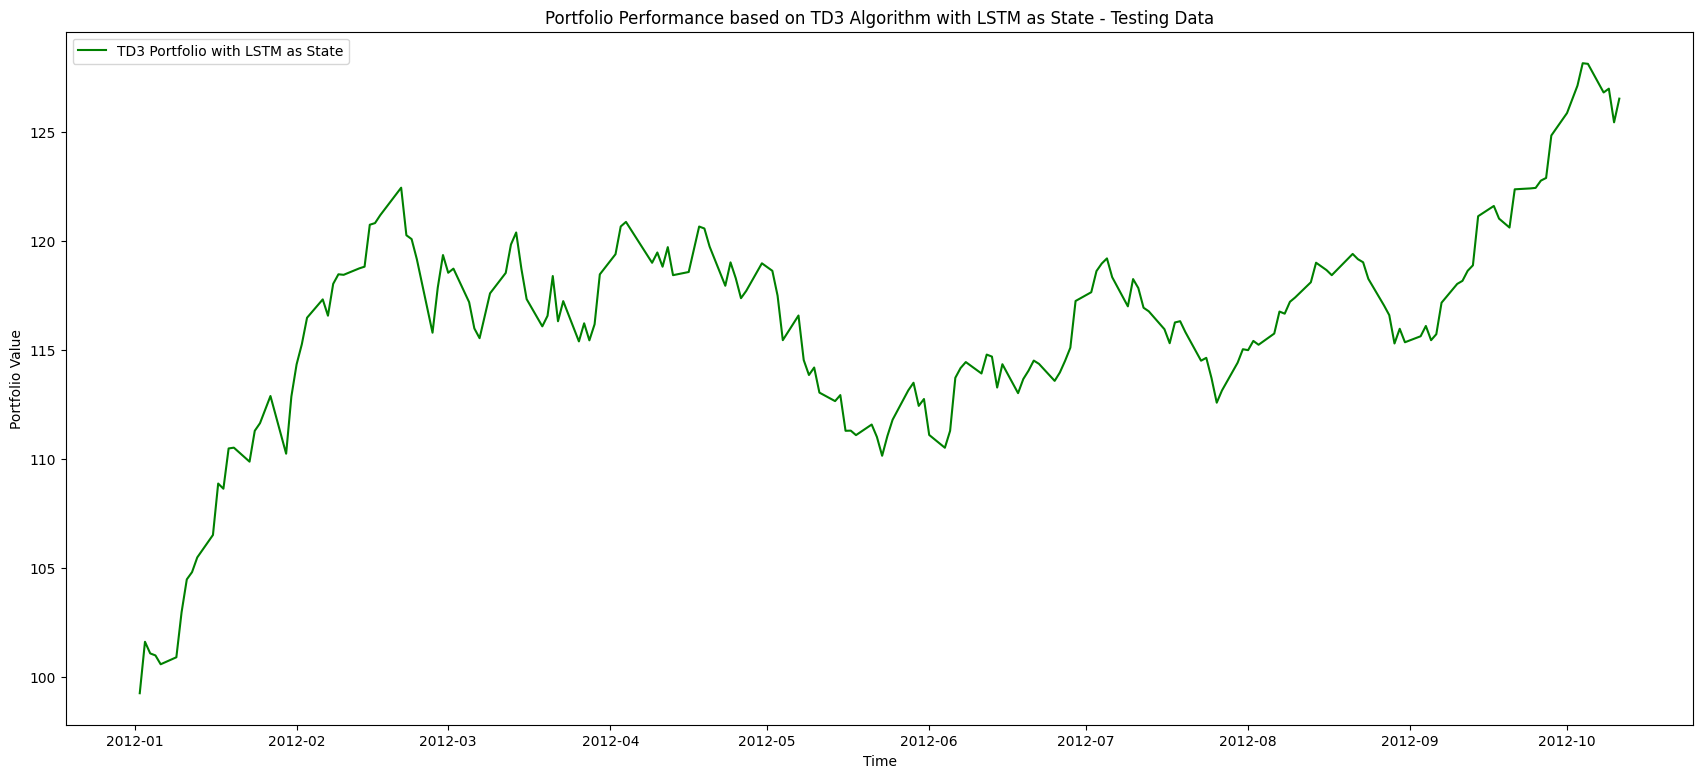

Final Portfolio Value: 126.54
Total Return: 26.54
Annualized Return: 35.55%
Sharpe Ratio: 2.1306
Maximum draw down(%): -10.0449


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(td3_test_returns_lstm)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = td3_test_returns_lstm['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(td3_test_returns_lstm["date"][1:], portfolio_values, label="TD3 Portfolio with LSTM as State", color="green")
plt.title("Portfolio Performance based on TD3 Algorithm with LSTM as State - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_td3_lstm"] = portfolio_returns

# Calculate performance metrics
final_value_test_td3_lstm = capital
total_return_test_td3_lstm = final_value_test_td3_lstm - initial_capital
sharpe_ratio_test_td3_lstm = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_td3_lstm = (final_value_test_td3_lstm / initial_capital) ** (1 / (len(td3_test_returns_lstm) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_td3_lstm = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_td3_lstm:.2f}")
print(f"Total Return: {total_return_test_td3_lstm:.2f}")
print(f"Annualized Return: {annualized_return_test_td3_lstm * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_td3_lstm:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_td3_lstm:.4f}")

## **V. Performance Analysis of RL agents using LSTM predictions as their states**

In [ ]:
returns_train = prices_train_data.pct_change() # get the assets daily returns
returns_test = prices_test_data.pct_change()


a2c_train_cum_returns_lstm = (1 + a2c_train_returns_lstm.copy().reset_index(drop=True).set_index(['date'])).cumprod()
a2c_train_cum_returns_lstm = a2c_train_cum_returns_lstm['daily_return']
a2c_train_cum_returns_lstm.name = 'A2C LSTM Model'

ppo_train_cum_returns_lstm = (1 + ppo_train_returns_lstm.copy().reset_index(drop=True).set_index(['date'])).cumprod()
ppo_train_cum_returns_lstm = ppo_train_cum_returns_lstm['daily_return']
ppo_train_cum_returns_lstm.name = 'PPO LSTM Model'

ddpg_train_cum_returns_lstm = (1 + ddpg_train_returns_lstm.copy().reset_index(drop=True).set_index(['date'])).cumprod()
ddpg_train_cum_returns_lstm = ddpg_train_cum_returns_lstm['daily_return']
ddpg_train_cum_returns_lstm.name = 'DDPG LSTM Model'

sac_train_cum_returns_lstm = (1 + sac_train_returns_lstm.copy().reset_index(drop=True).set_index(['date'])).cumprod()
sac_train_cum_returns_lstm = sac_train_cum_returns_lstm['daily_return']
sac_train_cum_returns_lstm.name = 'SAC LSTM Model'

td3_train_cum_returns_lstm = (1 + td3_train_returns_lstm.copy().reset_index(drop=True).set_index(['date'])).cumprod()
td3_train_cum_returns_lstm = td3_train_cum_returns_lstm['daily_return']
td3_train_cum_returns_lstm.name = 'TD3 LSTM Model'

date_list = list(ddpg_train_cum_returns_lstm.index)

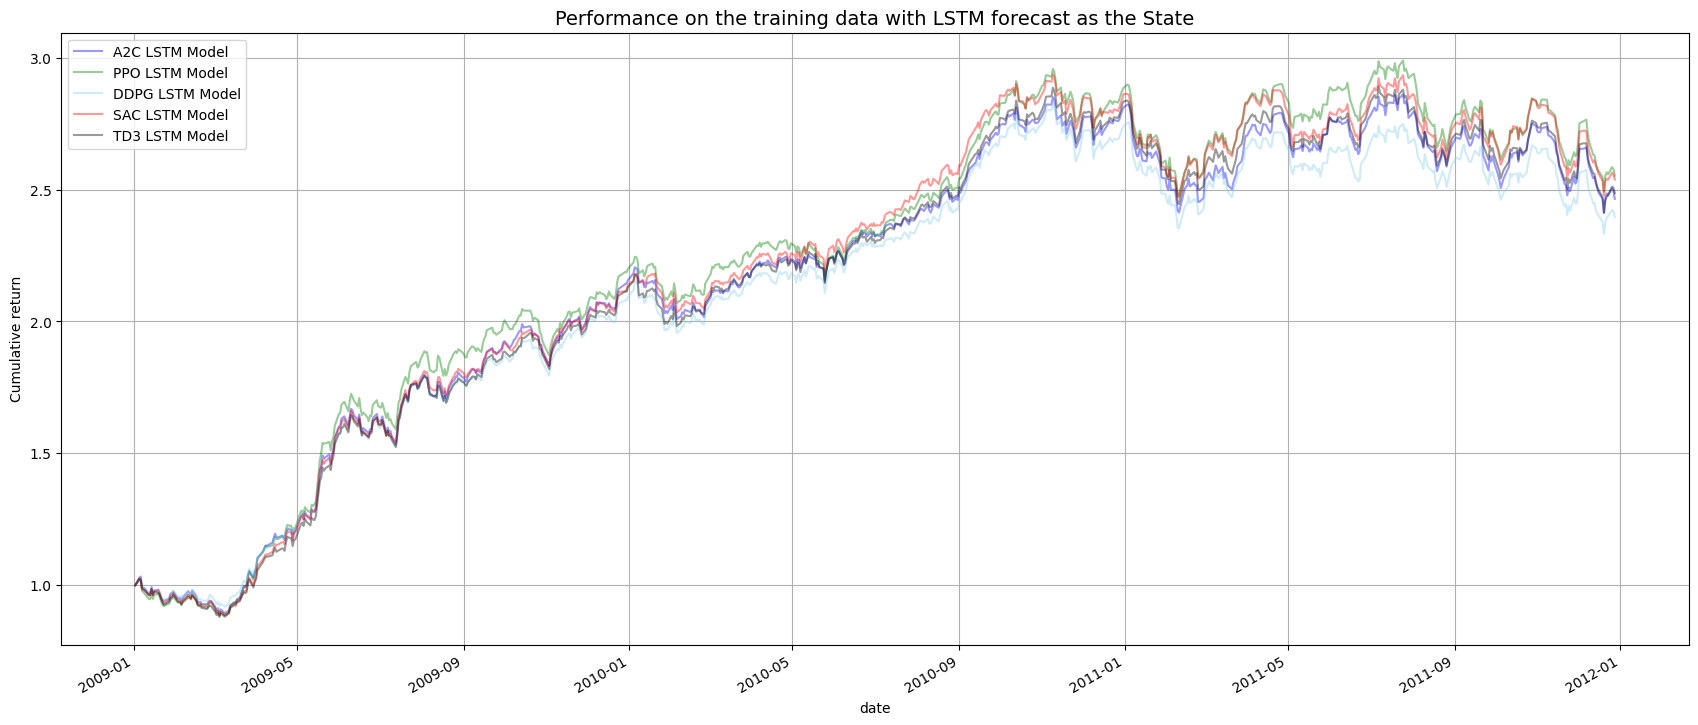

In [ ]:
%matplotlib inline

# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(21,9))
a2c_train_cum_returns_lstm.plot(ax=ax, color='blue', alpha=0.4)
ppo_train_cum_returns_lstm.plot(ax=ax, color='green', alpha=0.4)
ddpg_train_cum_returns_lstm.plot(ax=ax, color='skyblue', alpha=0.4)
sac_train_cum_returns_lstm.plot(ax=ax, color='red', alpha=0.4)
td3_train_cum_returns_lstm.plot(ax=ax, color='black', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("Cumulative return");
ax.set_title("Performance on the training data with LSTM forecast as the State", fontsize=14);
plt.show()

In [ ]:
%matplotlib inline

# get the culmulative returns for each portfolio

a2c_test_cum_returns_lstm = (1 + a2c_test_returns_lstm['daily_return']).cumprod()
a2c_test_cum_returns_lstm.name = 'A2C LSTM Model'
a2c_test_cum_returns_lstm.index = a2c_test_returns_lstm['date']

ppo_test_cum_returns_lstm = (1 + ppo_test_returns_lstm['daily_return']).cumprod()
ppo_test_cum_returns_lstm.name = 'PPO LSTM Model'
ppo_test_cum_returns_lstm.index = ppo_test_returns_lstm['date']

ddpg_test_cum_returns_lstm = (1 + ddpg_test_returns_lstm['daily_return']).cumprod()
ddpg_test_cum_returns_lstm.name = 'DDPG LSTM Model'
ddpg_test_cum_returns_lstm.index = ddpg_test_returns_lstm['date']

sac_test_cum_returns_lstm = (1 + sac_test_returns_lstm['daily_return']).cumprod()
sac_test_cum_returns_lstm.name = 'SAC LSTM Model'
sac_test_cum_returns_lstm.index = sac_test_returns_lstm['date']

td3_test_cum_returns_lstm = (1 + td3_test_returns_lstm['daily_return']).cumprod()
td3_test_cum_returns_lstm.name = 'TD3 LSTM Model'
td3_test_cum_returns_lstm.index = td3_test_returns_lstm['date']


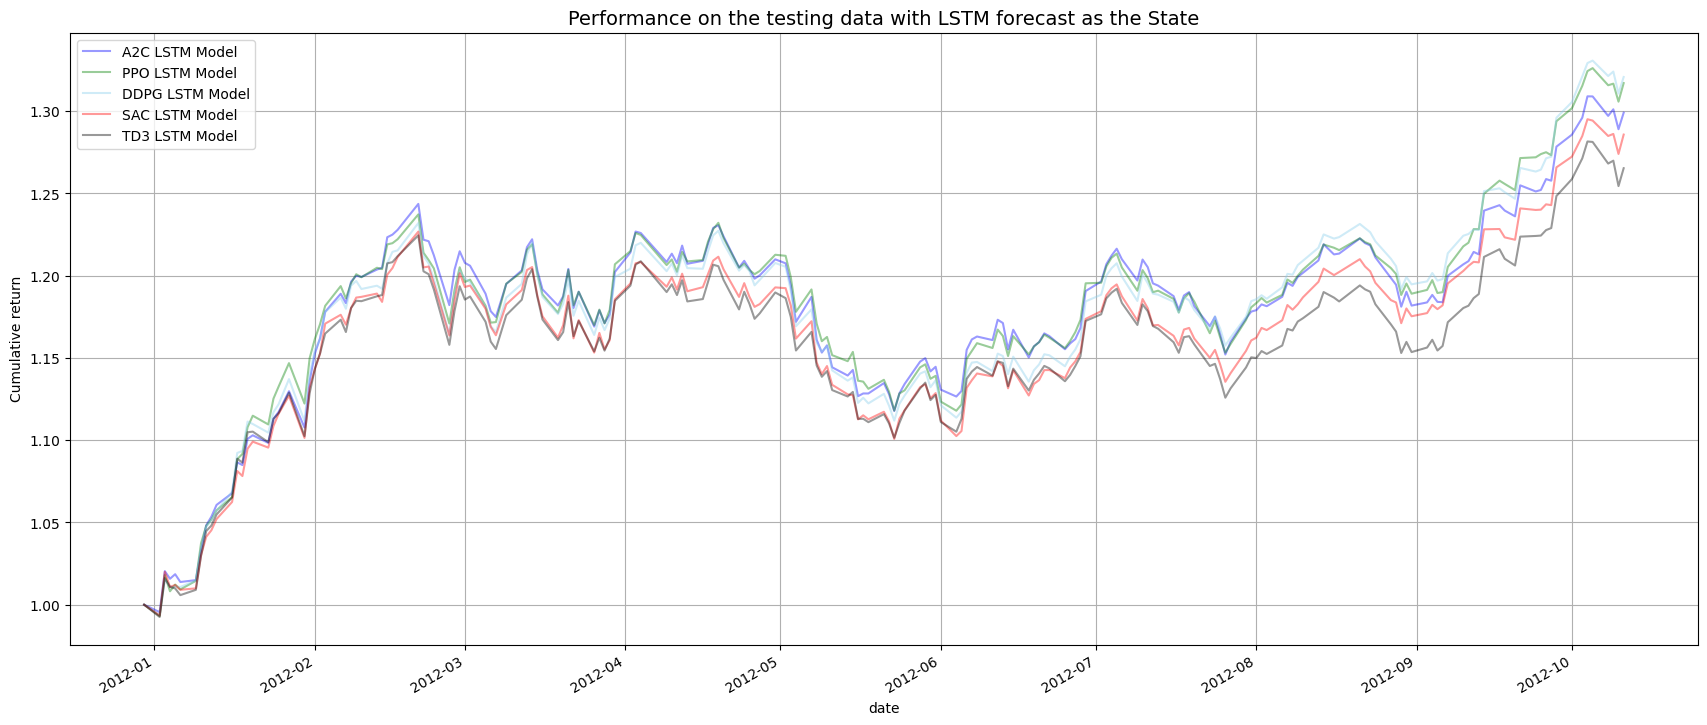

In [ ]:
%matplotlib inline
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(21,9))
a2c_test_cum_returns_lstm.plot(ax=ax, color='blue', alpha=.4)
ppo_test_cum_returns_lstm.plot(ax=ax, color='green', alpha=.4)
ddpg_test_cum_returns_lstm.plot(ax=ax, color='skyblue', alpha=.4)
sac_test_cum_returns_lstm.plot(ax=ax, color='red', alpha=0.4)
td3_test_cum_returns_lstm.plot(ax=ax, color='black', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("Cumulative return");
ax.set_title("Performance on the testing data with LSTM forecast as the State", fontsize=14);

<hr style='border:2px solid black'>

## **W. A2C RL Model with Transformer Model predictions as the state of the RL agent**

In [ ]:
stock_dimension = len(tickers)
state_space = stock_dimension

In [ ]:
env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": transformer_fcst,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

In [ ]:
e_train_gym = StockPortfolioEnv(df = train_data_transformer, **env_kwargs)

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

In [ ]:
# initialize
agent = DRLAgent(env = env_train)
model_a2c_transformer = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS_TRANSFORMER)

{'n_steps': 500, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [ ]:
trained_a2c_transformer = agent.train_model(model=model_a2c_transformer, tb_log_name='a2c', total_timesteps=total_timesteps_)
DynaCAAST_Model['a2c_transformer'] = trained_a2c_transformer

In [ ]:
import time
# A2C Train Model
e_trade_gym = StockPortfolioEnv(df = train_data_transformer, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_train_returns_transformer, _ = DRLAgent.DRL_prediction(model=trained_a2c_transformer, test_data = train_data_transformer, test_env = env_trade, test_obs = obs_trade)

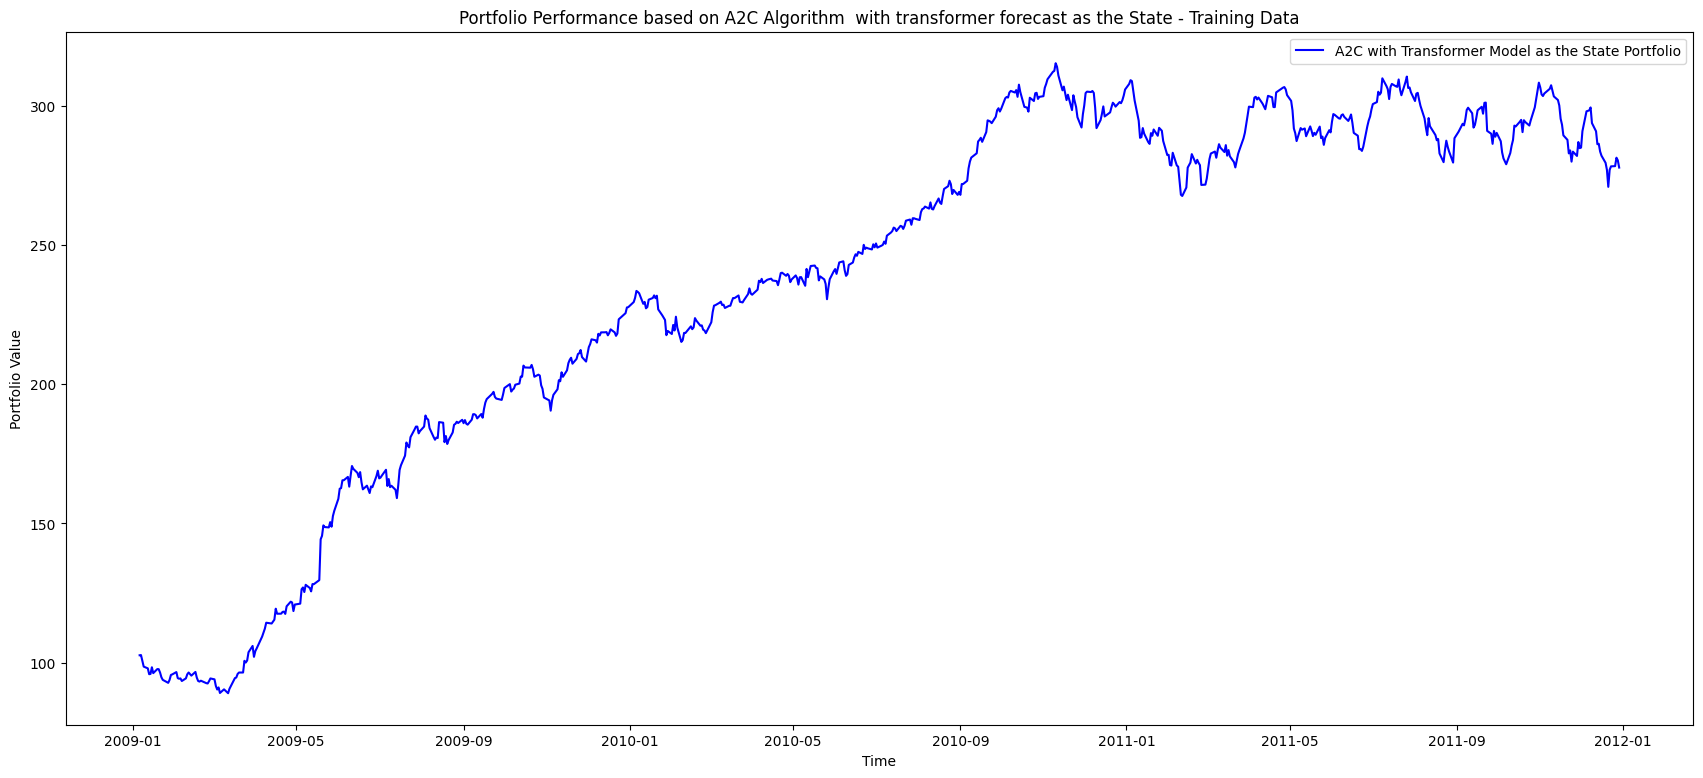

Final Portfolio Value: 277.90
Total Return: 177.90
Annualized Return: 41.83%
Sharpe Ratio: 1.9013
Maximum draw down(%): -15.1289


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(a2c_train_returns_transformer)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = a2c_train_returns_transformer['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="A2C with Transformer Model as the State Portfolio", color="blue")
plt.title("Portfolio Performance based on A2C Algorithm  with transformer forecast as the State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_a2c_transformer"] = portfolio_returns

# Calculate performance metrics
final_value_trg_a2c_transformer = capital
total_return_trg_a2c_transformer = final_value_trg_a2c_transformer - initial_capital
sharpe_ratio_trg_a2c_transformer = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_a2c_transformer = (final_value_trg_a2c_transformer / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_a2c_transformer = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_a2c_transformer:.2f}")
print(f"Total Return: {total_return_trg_a2c_transformer:.2f}")
print(f"Annualized Return: {annualized_return_trg_a2c_transformer * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_a2c_transformer:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_a2c_transformer:.4f}")

In [ ]:
# A2C Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_transformer, **env_kwargs)
env_a2c_transformer_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_transformer_test'] = copy.copy(env_a2c_transformer_test)
DynaCAAST_Obs['a2c_transformer_test'] = obs_trade.copy()
a2c_test_returns_transformer, _ = DRLAgent.DRL_prediction(model=trained_a2c_transformer, test_data = test_data_transformer, test_env = env_a2c_transformer_test, test_obs = obs_trade)

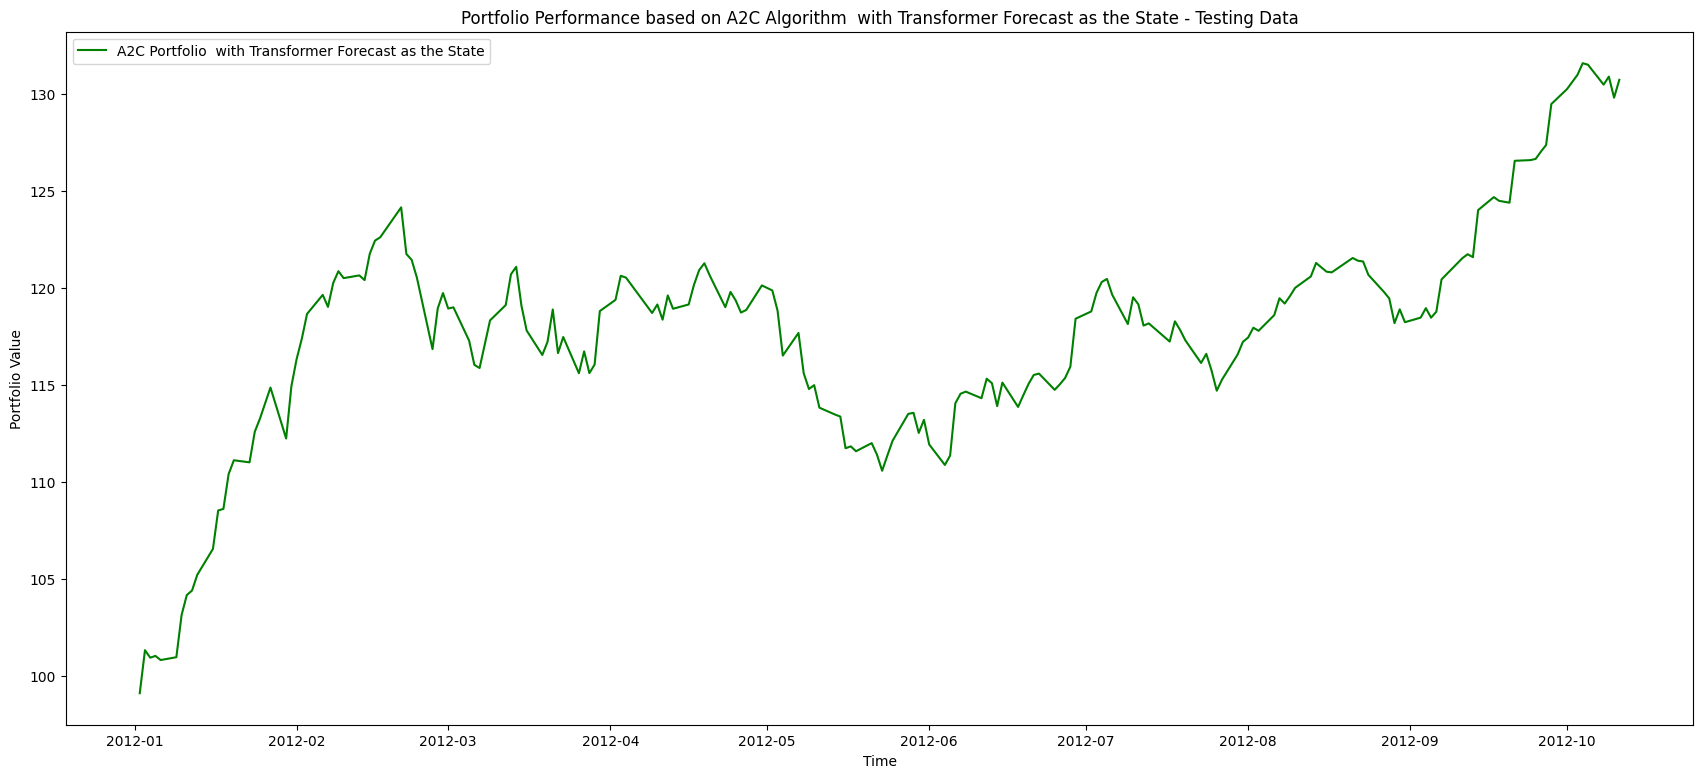

Final Portfolio Value: 130.72
Total Return: 30.72
Annualized Return: 41.37%
Sharpe Ratio : 2.4166
Maximum draw down(%): -10.9337


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(a2c_test_returns_transformer)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = a2c_test_returns_transformer['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(a2c_test_returns_transformer["date"][1:], portfolio_values, label="A2C Portfolio  with Transformer Forecast as the State", color="green")
plt.title("Portfolio Performance based on A2C Algorithm  with Transformer Forecast as the State - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_a2c_transformer"] = portfolio_returns

# Calculate performance metrics
final_value_test_a2c_transformer = capital
total_return_test_a2c_transformer = final_value_test_a2c_transformer - initial_capital
sharpe_ratio_test_a2c_transformer = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_a2c_transformer = (final_value_test_a2c_transformer / initial_capital) ** (1 / (len(returns_test_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_a2c_transformer = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_a2c_transformer:.2f}")
print(f"Total Return: {total_return_test_a2c_transformer:.2f}")
print(f"Annualized Return: {annualized_return_test_a2c_transformer * 100:.2f}%")
print(f"Sharpe Ratio : {sharpe_ratio_test_a2c_transformer:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_a2c_transformer:.4f}")

## **X. PPO RL Model with Transformer Model predictions as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)

model_ppo_transformer = agent.get_model("ppo", model_kwargs = PPO_PARAMS_TRANSFORMER)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [ ]:
trained_ppo_transformer = agent.train_model(model=model_ppo_transformer, tb_log_name='ppo', total_timesteps=total_timesteps_)
DynaCAAST_Model['ppo_transformer'] = trained_ppo_transformer

-----------------------------
| time/              |      |
|    fps             | 667  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 571       |
|    iterations           | 2         |
|    time_elapsed         | 7         |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -38.3     |
|    explained_variance   | 1.19e-07  |
|    learning_rate        | 0.0001    |
|    loss                 | 7.24e+14  |
|    n_updates            | 10        |
|    policy_gradient_loss | -8.57e-07 |
|    std                  | 1         |
|    value_loss           | 1.43e+15  |
---------------------------------------
------------------------------

In [ ]:
# PPO Train Model
e_trade_gym = StockPortfolioEnv(df = train_data_transformer, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ppo_train_returns_transformer, _ = DRLAgent.DRL_prediction(model=trained_ppo_transformer, test_data = train_data_transformer, test_env = env_trade, test_obs = obs_trade)

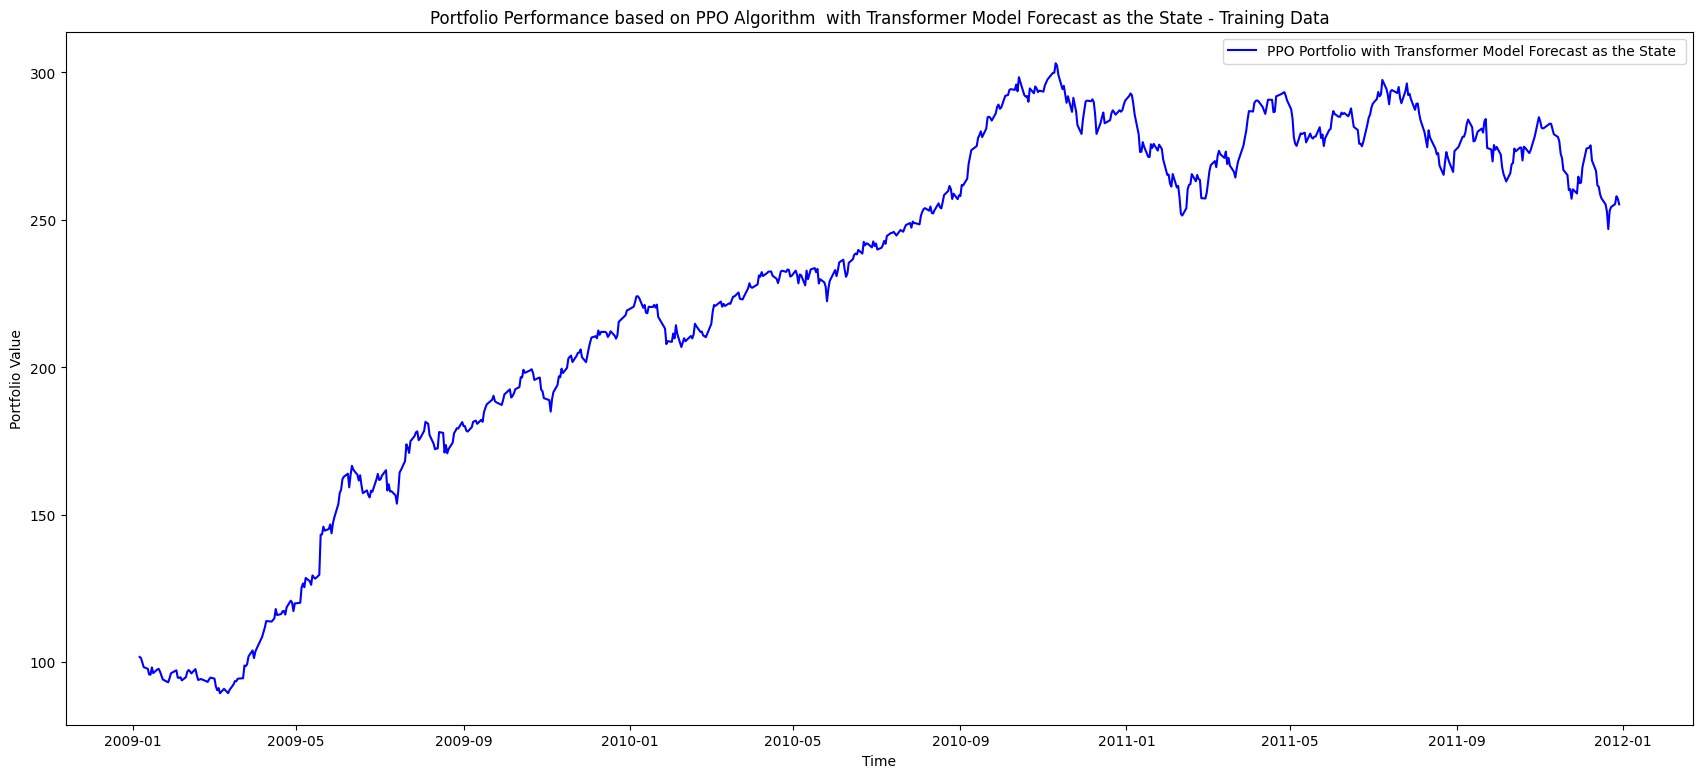

Final Portfolio Value: 255.30
Total Return: 155.30
Annualized Return: 37.78%
Sharpe Ratio: 1.7549
Maximum draw down(%): -17.0317


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ppo_train_returns_transformer)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ppo_train_returns_transformer['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="PPO Portfolio with Transformer Model Forecast as the State ", color="blue")
plt.title("Portfolio Performance based on PPO Algorithm  with Transformer Model Forecast as the State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_ppo_transformer"] = portfolio_returns

# Calculate performance metrics
final_value_trg_ppo_transformer = capital
total_return_trg_ppo_transformer = final_value_trg_ppo_transformer - initial_capital
sharpe_ratio_trg_ppo_transformer = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_ppo_transformer = (final_value_trg_ppo_transformer / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_ppo_transformer = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_ppo_transformer:.2f}")
print(f"Total Return: {total_return_trg_ppo_transformer:.2f}")
print(f"Annualized Return: {annualized_return_trg_ppo_transformer * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_ppo_transformer:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_ppo_transformer:.4f}")

In [ ]:
# PPO Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_transformer, **env_kwargs)
env_ppo_transformer_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_transformer_test'] = copy.copy(env_ppo_transformer_test)
DynaCAAST_Obs['ppo_transformer_test'] = obs_trade.copy()
ppo_test_returns_transformer, _ = DRLAgent.DRL_prediction(model=trained_ppo_transformer, test_data = test_data_transformer, test_env = env_ppo_transformer_test, test_obs = obs_trade)

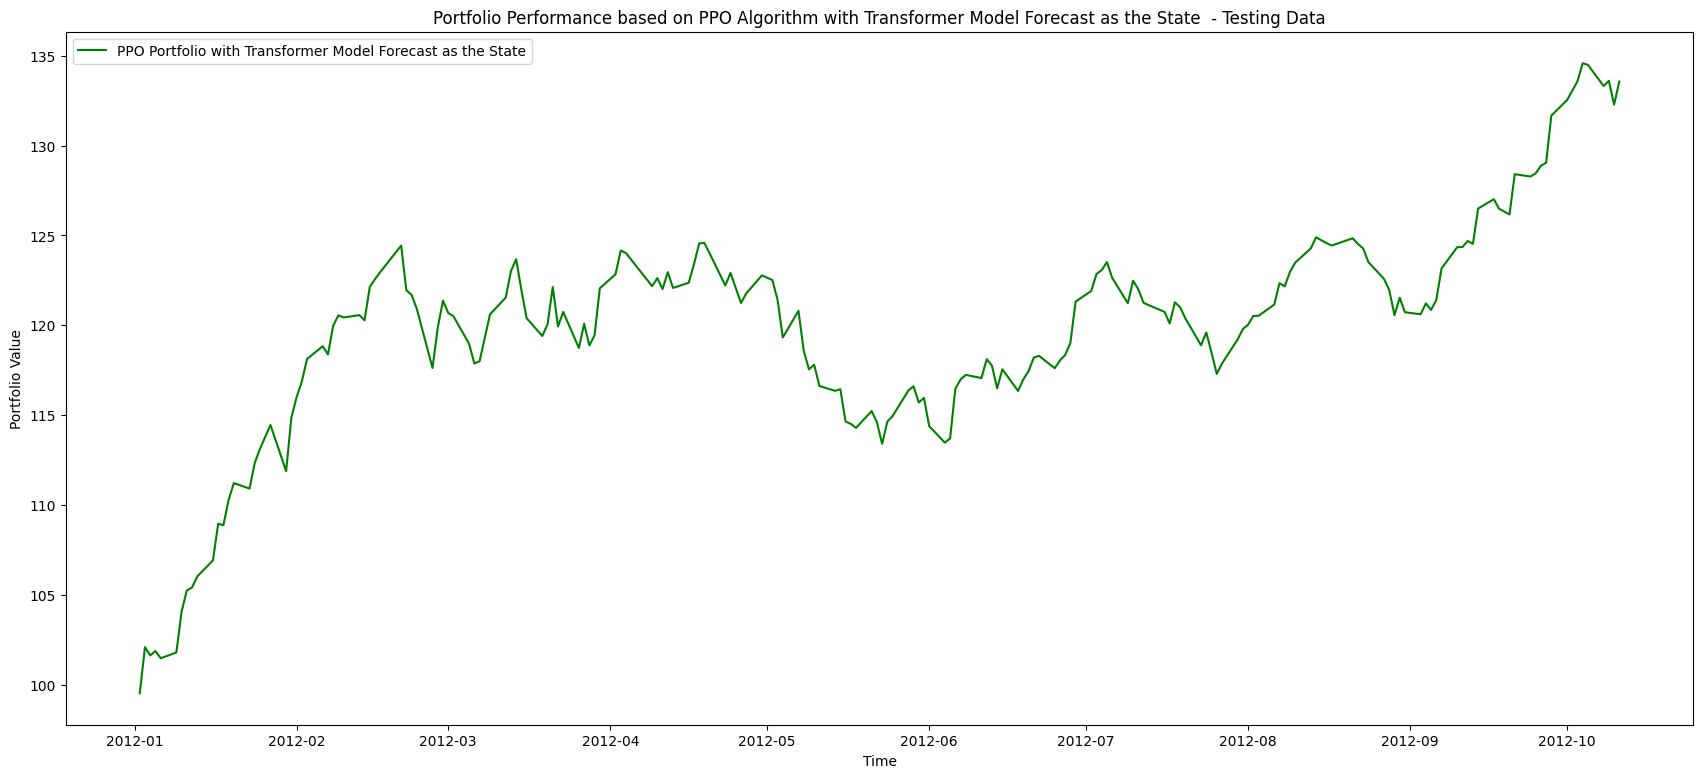

Final Portfolio Value: 133.56
Total Return: 33.56
Annualized Return: 45.35%
Sharpe Ratio: 2.5754
Maximum draw down(%): -8.9664


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ppo_test_returns_transformer)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ppo_test_returns_transformer['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(ppo_test_returns_transformer["date"][1:], portfolio_values, label="PPO Portfolio with Transformer Model Forecast as the State", color="green")
plt.title("Portfolio Performance based on PPO Algorithm with Transformer Model Forecast as the State  - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_ppo_transformer"] = portfolio_returns

# Calculate performance metrics
final_value_test_ppo_transformer = capital
total_return_test_ppo_transformer = final_value_test_ppo_transformer - initial_capital
sharpe_ratio_test_ppo_transformer = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_ppo_transformer = (final_value_test_ppo_transformer / initial_capital) ** (1 / (len(ppo_test_returns_transformer) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_ppo_transformer = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_ppo_transformer:.2f}")
print(f"Total Return: {total_return_test_ppo_transformer:.2f}")
print(f"Annualized Return: {annualized_return_test_ppo_transformer * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_ppo_transformer:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_ppo_transformer:.4f}")

## **Y. DDPG RL Model with Transformer Model predictions as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_ddpg_transformer = agent.get_model("ddpg", model_kwargs = DDPG_PARAMS_TRANSFORMER)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_ddpg_transformer = agent.train_model(model= model_ddpg_transformer, tb_log_name='ddpg',  total_timesteps=total_timesteps_)
DynaCAAST_Model['ddpg_transformer'] = trained_ddpg_transformer

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 43        |
|    time_elapsed    | 68        |
|    total_timesteps | 2948      |
| train/             |           |
|    actor_loss      | -2.68e+07 |
|    critic_loss     | 6.97e+10  |
|    learning_rate   | 0.001     |
|    n_updates       | 2847      |
----------------------------------


In [ ]:
# DDPG Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_transformer, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_train_returns_transformer, _ = DRLAgent.DRL_prediction(model=trained_ddpg_transformer, test_data = train_data_transformer, test_env = env_trade, test_obs = obs_trade)

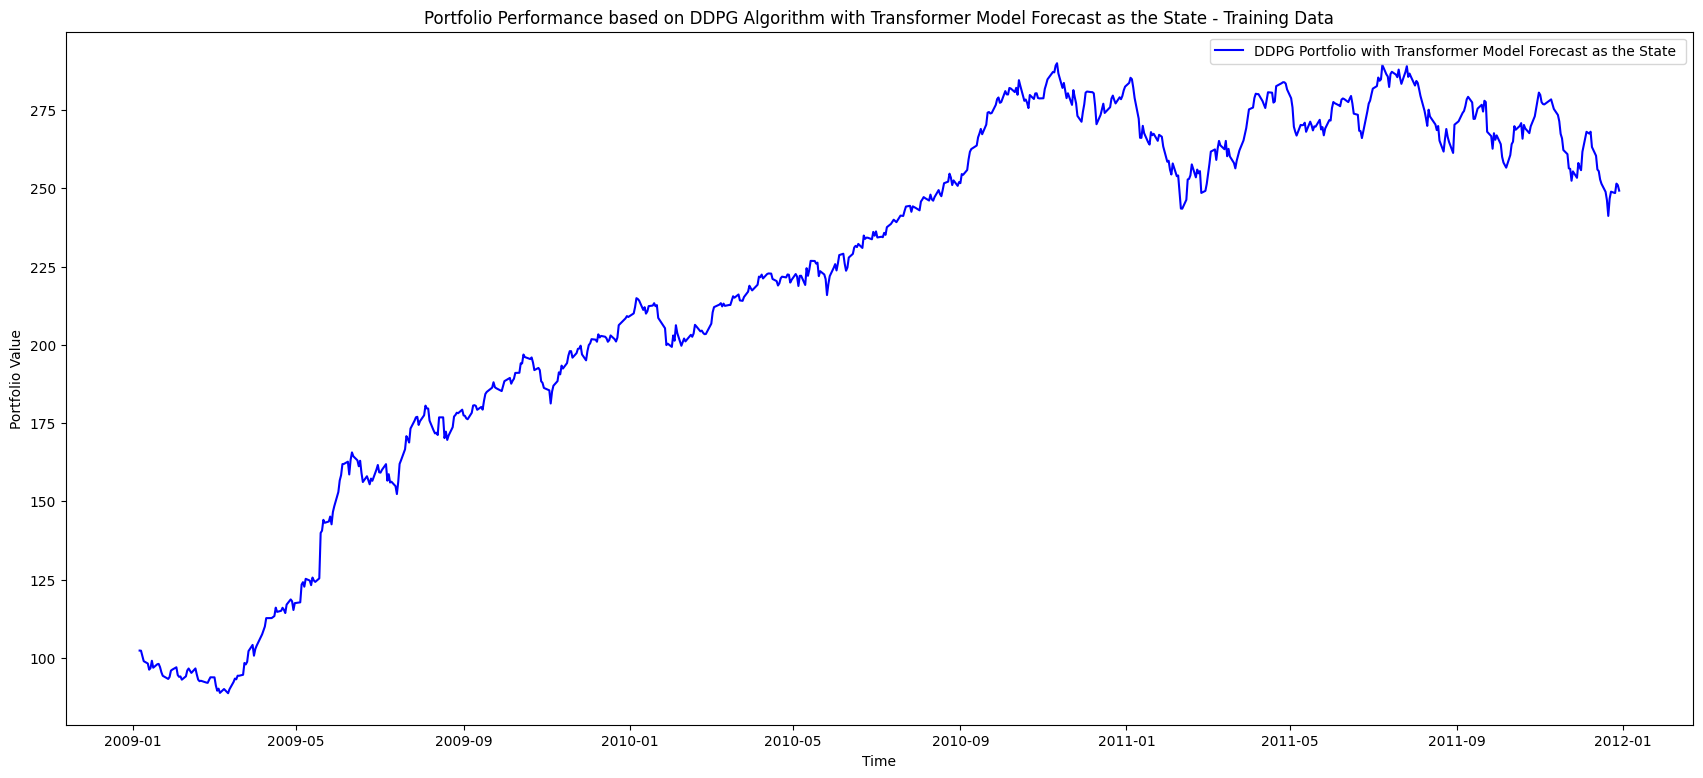

Final Portfolio Value: 249.23
Total Return: 149.23
Annualized Return: 36.65%
Sharpe Ratio: 1.7101
Maximum draw down(%): -16.6617


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ddpg_train_returns_transformer)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ddpg_train_returns_transformer['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="DDPG Portfolio with Transformer Model Forecast as the State ", color="blue")
plt.title("Portfolio Performance based on DDPG Algorithm with Transformer Model Forecast as the State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_ddpg_transformer"] = portfolio_returns

# Calculate performance metrics
final_value_trg_ddpg_transformer = capital
total_return_trg_ddpg_transformer = final_value_trg_ddpg_transformer - initial_capital
sharpe_ratio_trg_ddpg_transformer = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_ddpg_transformer = (final_value_trg_ddpg_transformer / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_ddpg_transformer = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_ddpg_transformer:.2f}")
print(f"Total Return: {total_return_trg_ddpg_transformer:.2f}")
print(f"Annualized Return: {annualized_return_trg_ddpg_transformer * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_ddpg_transformer:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_ddpg_transformer:.4f}")

In [ ]:
# DDPG Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_transformer, **env_kwargs)
env_ddpg_transformer_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_transformer_test'] = copy.copy(env_ddpg_transformer_test)
DynaCAAST_Obs['ddpg_transformer_test'] = obs_trade.copy()
ddpg_test_returns_transformer, _ = DRLAgent.DRL_prediction(model=trained_ddpg_transformer, test_data = test_data_transformer, test_env = env_ddpg_transformer_test, test_obs = obs_trade)

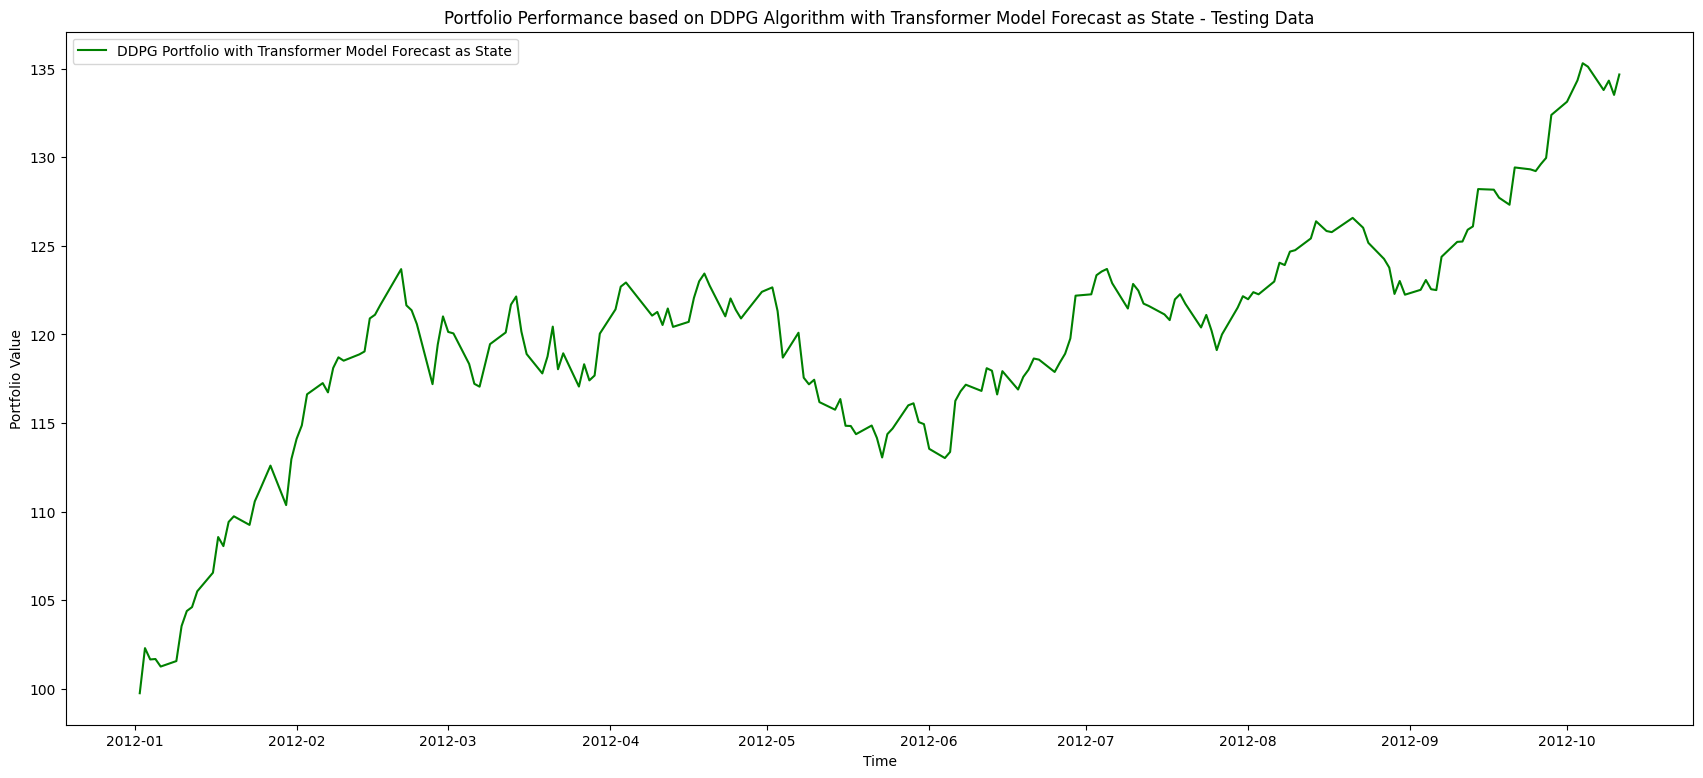

Final Portfolio Value: 134.68
Total Return: 34.68
Annualized Return: 46.93%
Sharpe Ratio: 2.6608
Maximum draw down(%): -8.6250


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ddpg_test_returns_transformer)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ddpg_test_returns_transformer['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(ddpg_test_returns_transformer["date"][1:], portfolio_values, label="DDPG Portfolio with Transformer Model Forecast as State", color="green")
plt.title("Portfolio Performance based on DDPG Algorithm with Transformer Model Forecast as State - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_ddpg_transformer"] = portfolio_returns

# Calculate performance metrics
final_value_test_ddpg_transformer = capital
total_return_test_ddpg_transformer = final_value_test_ddpg_transformer - initial_capital
sharpe_ratio_test_ddpg_transformer = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_ddpg_transformer = (final_value_test_ddpg_transformer / initial_capital) ** (1 / (len(ddpg_test_returns_transformer) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_ddpg_transformer = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_ddpg_transformer:.2f}")
print(f"Total Return: {total_return_test_ddpg_transformer:.2f}")
print(f"Annualized Return: {annualized_return_test_ddpg_transformer * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_ddpg_transformer:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_ddpg_transformer:.4f}")

## **Z. SAC RL Model with Transformer Model predictions as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_sac_transformer = agent.get_model("sac",model_kwargs = SAC_PARAMS_TRANSFORMER)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0003, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


In [ ]:
trained_sac_transformer = agent.train_model(model=model_sac_transformer, tb_log_name='sac', total_timesteps=total_timesteps_)
DynaCAAST_Model['sac_transformer'] = trained_sac_transformer

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 38        |
|    time_elapsed    | 77        |
|    total_timesteps | 2948      |
| train/             |           |
|    actor_loss      | -2.43e+07 |
|    critic_loss     | 4.24e+12  |
|    ent_coef        | 0.23      |
|    ent_coef_loss   | 572       |
|    learning_rate   | 0.0003    |
|    n_updates       | 2847      |
----------------------------------


In [ ]:
#  SAC Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_transformer, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

sac_train_returns_transformer, _ = DRLAgent.DRL_prediction(model=trained_sac_transformer, test_data = train_data_transformer, test_env = env_trade, test_obs = obs_trade)

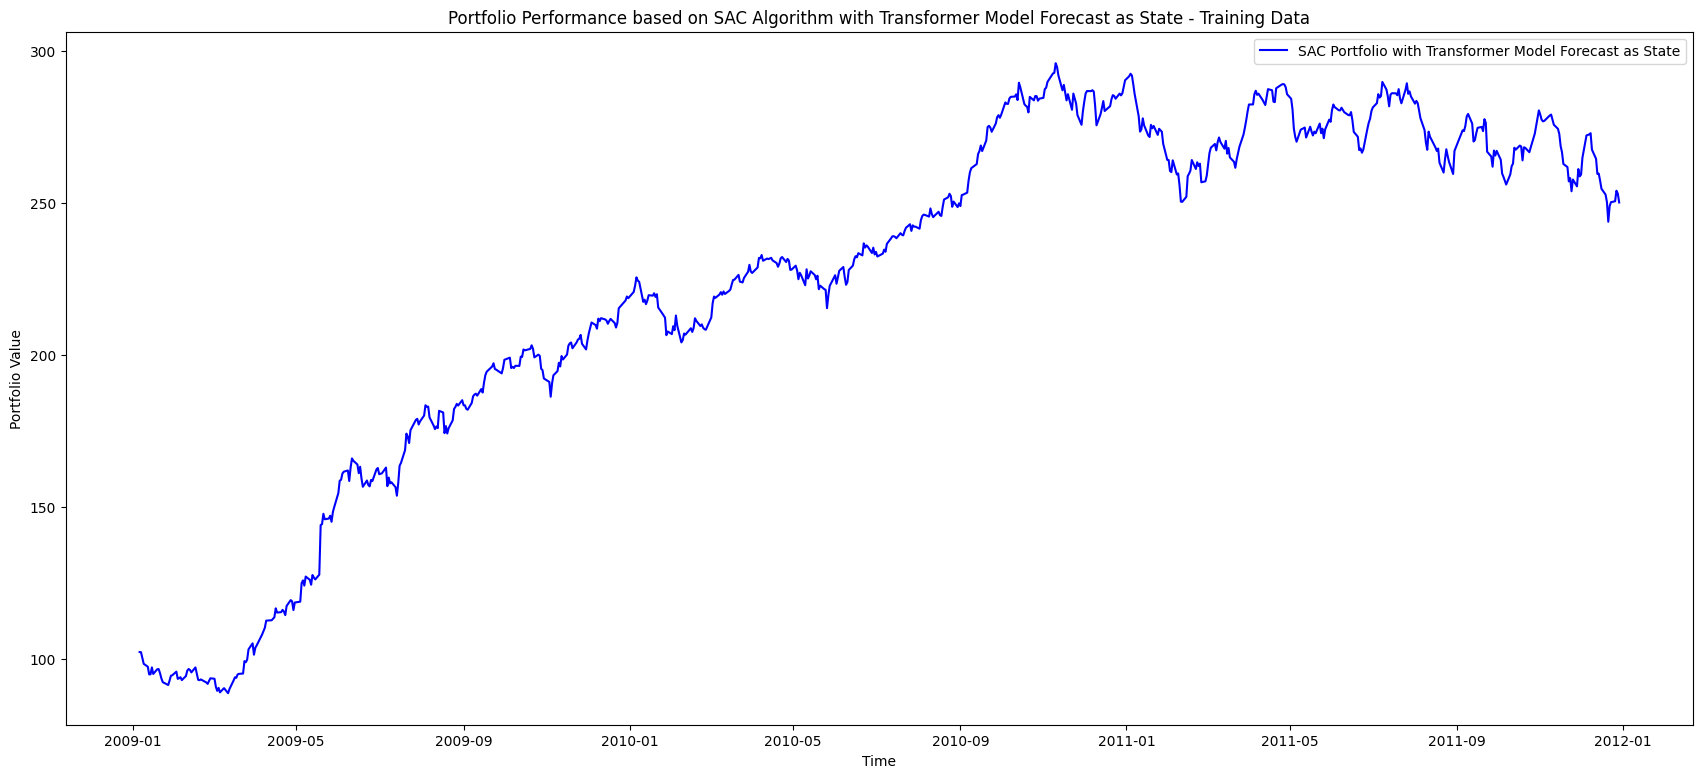

Final Portfolio Value: 250.08
Total Return: 150.08
Annualized Return: 36.81%
Sharpe Ratio Kelly: 1.6368
Maximum draw down(%): -16.6372


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(sac_train_returns_transformer)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = sac_train_returns_transformer['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="SAC Portfolio with Transformer Model Forecast as State", color="blue")
plt.title("Portfolio Performance based on SAC Algorithm with Transformer Model Forecast as State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_sac_transformer"] = portfolio_returns

# Calculate performance metrics
final_value_trg_sac_transformer = capital
total_return_trg_sac_transformer = final_value_trg_sac_transformer - initial_capital
sharpe_ratio_trg_sac_transformer = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_sac_transformer = (final_value_trg_sac_transformer / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_sac_transformer = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_sac_transformer:.2f}")
print(f"Total Return: {total_return_trg_sac_transformer:.2f}")
print(f"Annualized Return: {annualized_return_trg_sac_transformer * 100:.2f}%")
print(f"Sharpe Ratio Kelly: {sharpe_ratio_trg_sac_transformer:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_sac_transformer:.4f}")

In [ ]:
# SAC Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_transformer, **env_kwargs)
env_sac_transformer_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_transformer_test'] = copy.copy(env_sac_transformer_test)
DynaCAAST_Obs['sac_transformer_test'] = obs_trade.copy()
sac_test_returns_transformer, _ = DRLAgent.DRL_prediction(model=trained_sac_transformer, test_data = test_data_transformer, test_env = env_sac_transformer_test, test_obs = obs_trade)

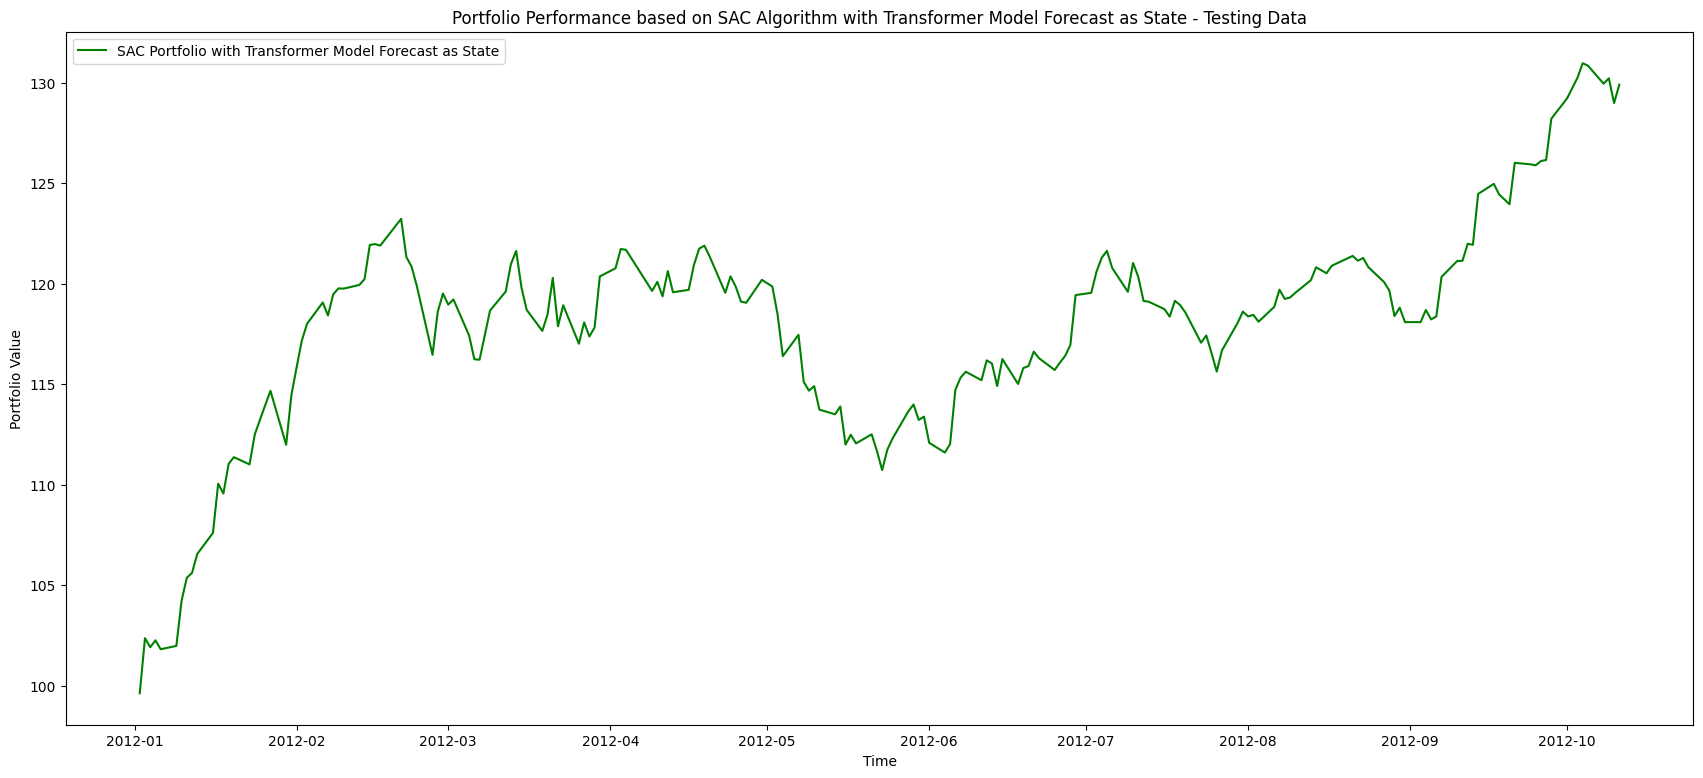

Final Portfolio Value: 129.89
Total Return: 29.89
Annualized Return: 40.21%
Sharpe Ratio: 2.3614
Maximum draw down(%): -10.1444


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(sac_test_returns_transformer)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = sac_test_returns_transformer['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(sac_test_returns_transformer["date"][1:], portfolio_values, label="SAC Portfolio with Transformer Model Forecast as State", color="green")
plt.title("Portfolio Performance based on SAC Algorithm with Transformer Model Forecast as State - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_sac_transformer"] = portfolio_returns

# Calculate performance metrics
final_value_test_sac_transformer = capital
total_return_test_sac_transformer = final_value_test_sac_transformer - initial_capital
sharpe_ratio_test_sac_transformer = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_sac_transformer = (final_value_test_sac_transformer / initial_capital) ** (1 / (len(sac_test_returns_transformer) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_sac_transformer = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_sac_transformer:.2f}")
print(f"Total Return: {total_return_test_sac_transformer:.2f}")
print(f"Annualized Return: {annualized_return_test_sac_transformer * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_sac_transformer:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_sac_transformer:.4f}")

## **AA. TD3 RL Model with Transformer Model predictions as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_td3_transformer = agent.get_model("td3", model_kwargs = TD3_PARAMS_TRANSFORMER)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_td3_transformer = agent.train_model(model=model_td3_transformer, tb_log_name='td3', total_timesteps=total_timesteps_)
DynaCAAST_Model['td3_transformer'] = trained_td3_transformer

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 46        |
|    time_elapsed    | 63        |
|    total_timesteps | 2948      |
| train/             |           |
|    actor_loss      | -1.45e+07 |
|    critic_loss     | 7.92e+10  |
|    learning_rate   | 0.001     |
|    n_updates       | 2847      |
----------------------------------


In [ ]:
# td3 Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_transformer, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

td3_train_returns_transformer, _ = DRLAgent.DRL_prediction(model=trained_td3_transformer, test_data = train_data_transformer, test_env = env_trade, test_obs = obs_trade)

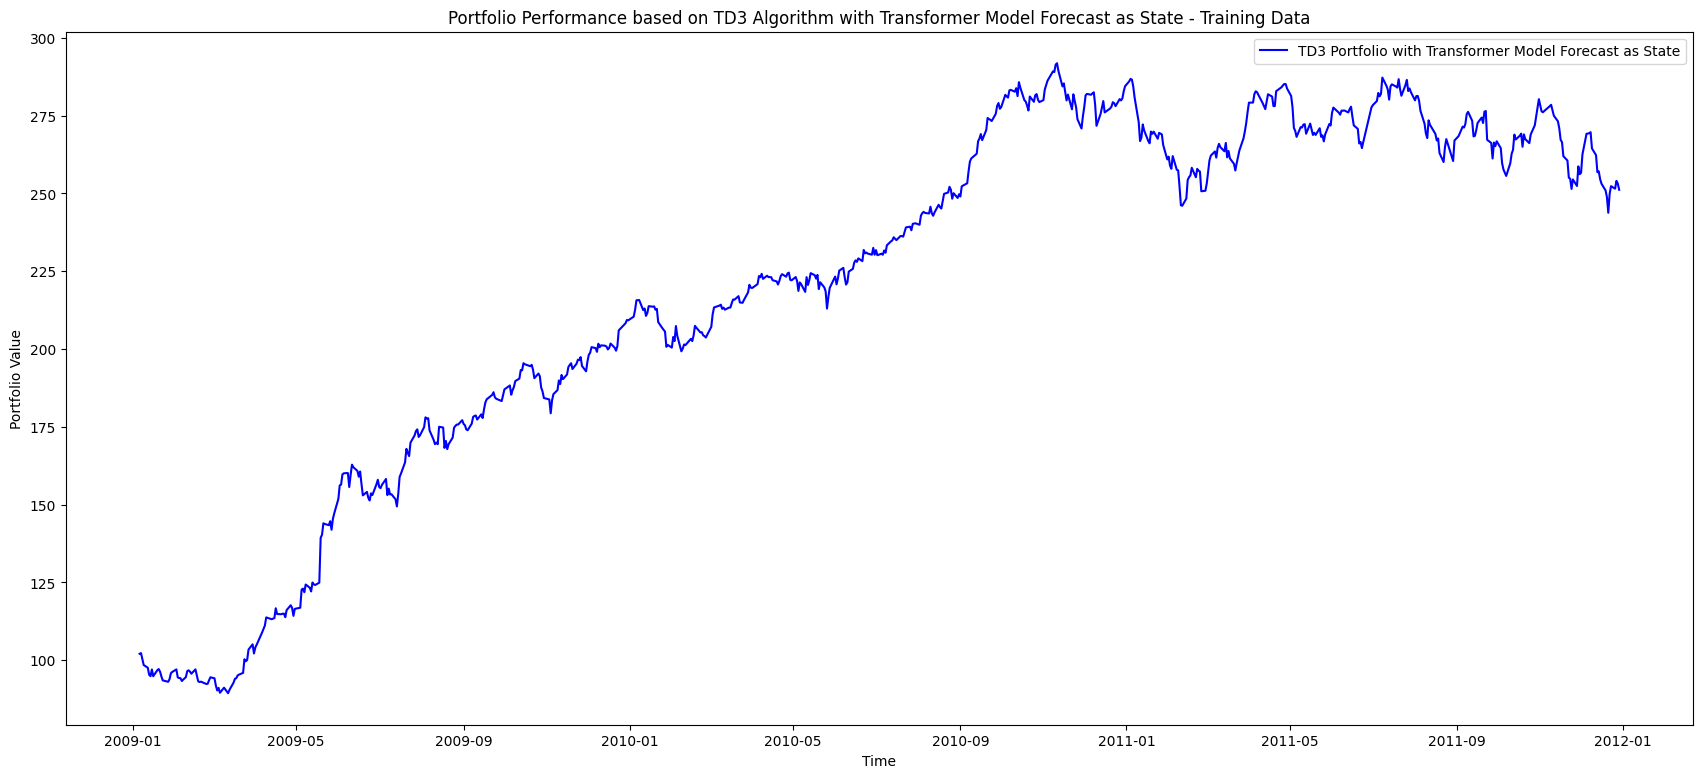

Final Portfolio Value: 251.17
Total Return: 151.17
Annualized Return: 37.01%
Sharpe Ratio: 1.6939
Maximum draw down(%): -15.6917


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(td3_train_returns_transformer)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = td3_train_returns_transformer['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="TD3 Portfolio with Transformer Model Forecast as State", color="blue")
plt.title("Portfolio Performance based on TD3 Algorithm with Transformer Model Forecast as State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_td3_transformer"] = portfolio_returns

# Calculate performance metrics
final_value_trg_td3_transformer = capital
total_return_trg_td3_transformer = final_value_trg_td3_transformer - initial_capital
sharpe_ratio_trg_td3_transformer = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_td3_transformer = (final_value_trg_td3_transformer / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_td3_transformer = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_td3_transformer:.2f}")
print(f"Total Return: {total_return_trg_td3_transformer:.2f}")
print(f"Annualized Return: {annualized_return_trg_td3_transformer * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_td3_transformer:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_td3_transformer:.4f}")

In [ ]:
# TD3 Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_transformer, **env_kwargs)
env_td3_transformer_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_transformer_test'] = copy.copy(env_td3_transformer_test)
DynaCAAST_Obs['td3_transformer_test'] = obs_trade.copy()
td3_test_returns_transformer, _ = DRLAgent.DRL_prediction(model=trained_td3_transformer, test_data = test_data_transformer, test_env = env_td3_transformer_test, test_obs = obs_trade)

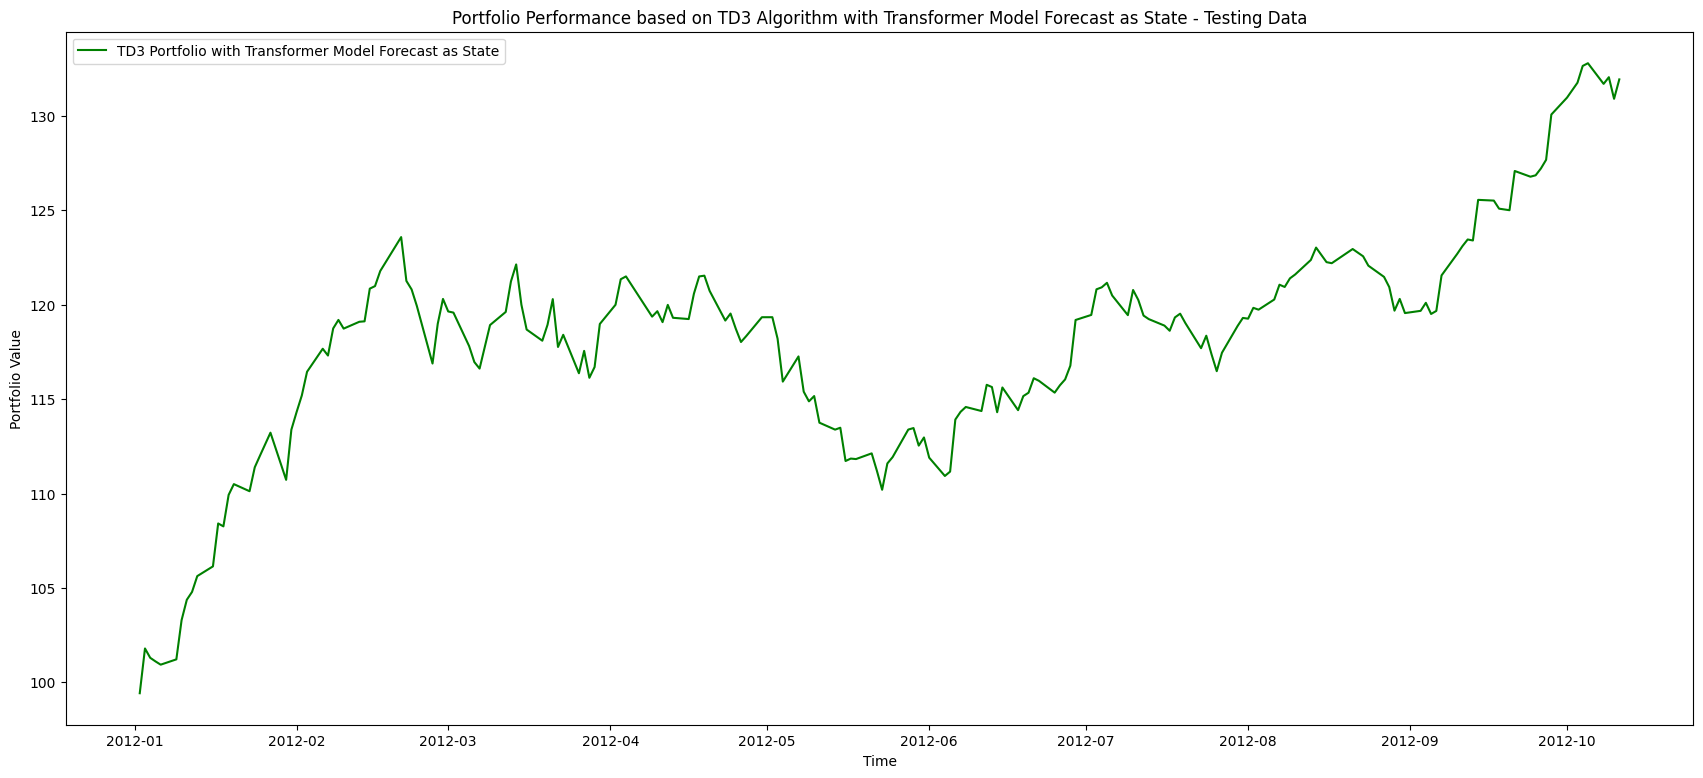

Final Portfolio Value: 131.94
Total Return: 31.94
Annualized Return: 43.07%
Sharpe Ratio: 2.5191
Maximum draw down(%): -10.8317


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(td3_test_returns_transformer)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = td3_test_returns_transformer['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(td3_test_returns_transformer["date"][1:], portfolio_values, label="TD3 Portfolio with Transformer Model Forecast as State", color="green")
plt.title("Portfolio Performance based on TD3 Algorithm with Transformer Model Forecast as State - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_td3_transformer"] = portfolio_returns

# Calculate performance metrics
final_value_test_td3_transformer = capital
total_return_test_td3_transformer = final_value_test_td3_transformer - initial_capital
sharpe_ratio_test_td3_transformer = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_td3_transformer = (final_value_test_td3_transformer / initial_capital) ** (1 / (len(td3_test_returns_transformer) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_td3_transformer = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_td3_transformer:.2f}")
print(f"Total Return: {total_return_test_td3_transformer:.2f}")
print(f"Annualized Return: {annualized_return_test_td3_transformer * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_td3_transformer:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_td3_transformer:.4f}")

## **AB. Performance Analysis of RL agents using Transformer Model predictions as their states**

In [ ]:
returns_train = prices_train_data.pct_change() # get the assets daily returns
returns_test = prices_test_data.pct_change()


a2c_train_cum_returns_transformer = (1 + a2c_train_returns_transformer.copy().reset_index(drop=True).set_index(['date'])).cumprod()
a2c_train_cum_returns_transformer = a2c_train_cum_returns_transformer['daily_return']
a2c_train_cum_returns_transformer.name = 'A2C Transformer Model'

ppo_train_cum_returns_transformer = (1 + ppo_train_returns_transformer.copy().reset_index(drop=True).set_index(['date'])).cumprod()
ppo_train_cum_returns_transformer = ppo_train_cum_returns_transformer['daily_return']
ppo_train_cum_returns_transformer.name = 'PPO Transformer Model'

ddpg_train_cum_returns_transformer = (1 + ddpg_train_returns_transformer.copy().reset_index(drop=True).set_index(['date'])).cumprod()
ddpg_train_cum_returns_transformer = ddpg_train_cum_returns_transformer['daily_return']
ddpg_train_cum_returns_transformer.name = 'DDPG Transformer Model'

sac_train_cum_returns_transformer = (1 + sac_train_returns_transformer.copy().reset_index(drop=True).set_index(['date'])).cumprod()
sac_train_cum_returns_transformer = sac_train_cum_returns_transformer['daily_return']
sac_train_cum_returns_transformer.name = 'SAC Transformer Model'

td3_train_cum_returns_transformer = (1 + td3_train_returns_transformer.copy().reset_index(drop=True).set_index(['date'])).cumprod()
td3_train_cum_returns_transformer = td3_train_cum_returns_transformer['daily_return']
td3_train_cum_returns_transformer.name = 'TD3 Transformer Model'

date_list = list(ddpg_train_cum_returns_transformer.index)

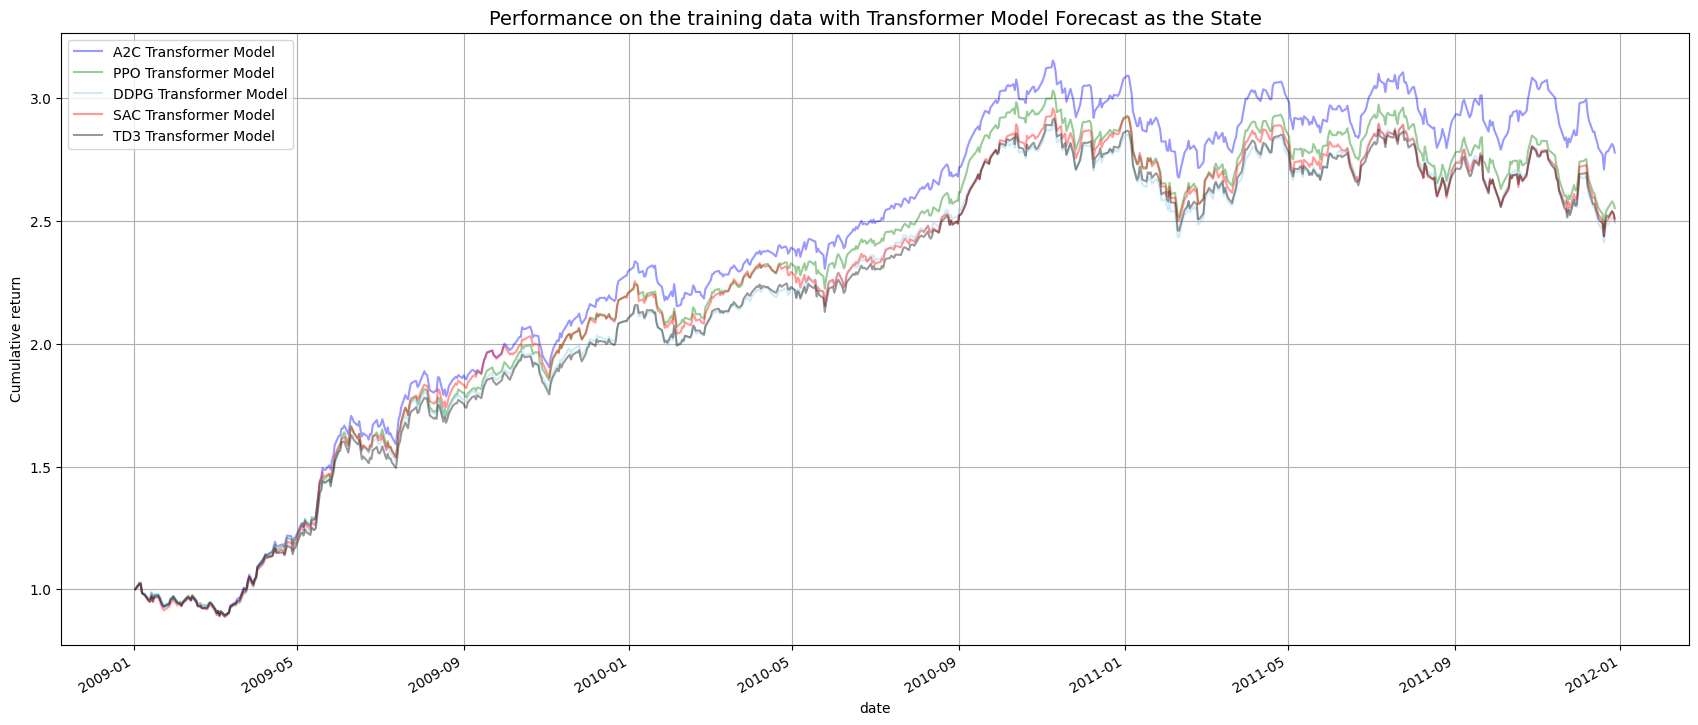

In [ ]:
%matplotlib inline

# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(21,9))
a2c_train_cum_returns_transformer.plot(ax=ax, color='blue', alpha=0.4)
ppo_train_cum_returns_transformer.plot(ax=ax, color='green', alpha=0.4)
ddpg_train_cum_returns_transformer.plot(ax=ax, color='skyblue', alpha=0.4)
sac_train_cum_returns_transformer.plot(ax=ax, color='red', alpha=0.4)
td3_train_cum_returns_transformer.plot(ax=ax, color='black', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("Cumulative return");
ax.set_title("Performance on the training data with Transformer Model Forecast as the State", fontsize=14);
plt.show()

In [ ]:
%matplotlib inline

# get the culmulative returns for each portfolio

a2c_test_cum_returns_transformer = (1 + a2c_test_returns_transformer['daily_return']).cumprod()
a2c_test_cum_returns_transformer.name = 'A2C Transformer Model'
a2c_test_cum_returns_transformer.index = a2c_test_returns_transformer['date']

ppo_test_cum_returns_transformer = (1 + ppo_test_returns_transformer['daily_return']).cumprod()
ppo_test_cum_returns_transformer.name = 'PPO Transformer Model'
ppo_test_cum_returns_transformer.index = ppo_test_returns_transformer['date']

ddpg_test_cum_returns_transformer = (1 + ddpg_test_returns_transformer['daily_return']).cumprod()
ddpg_test_cum_returns_transformer.name = 'DDPG Transformer Model'
ddpg_test_cum_returns_transformer.index = ddpg_test_returns_transformer['date']

sac_test_cum_returns_transformer = (1 + sac_test_returns_transformer['daily_return']).cumprod()
sac_test_cum_returns_transformer.name = 'SAC Transformer Model'
sac_test_cum_returns_transformer.index = sac_test_returns_transformer['date']

td3_test_cum_returns_transformer = (1 + td3_test_returns_transformer['daily_return']).cumprod()
td3_test_cum_returns_transformer.name = 'TD3 Transformer Model'
td3_test_cum_returns_transformer.index = td3_test_returns_transformer['date']


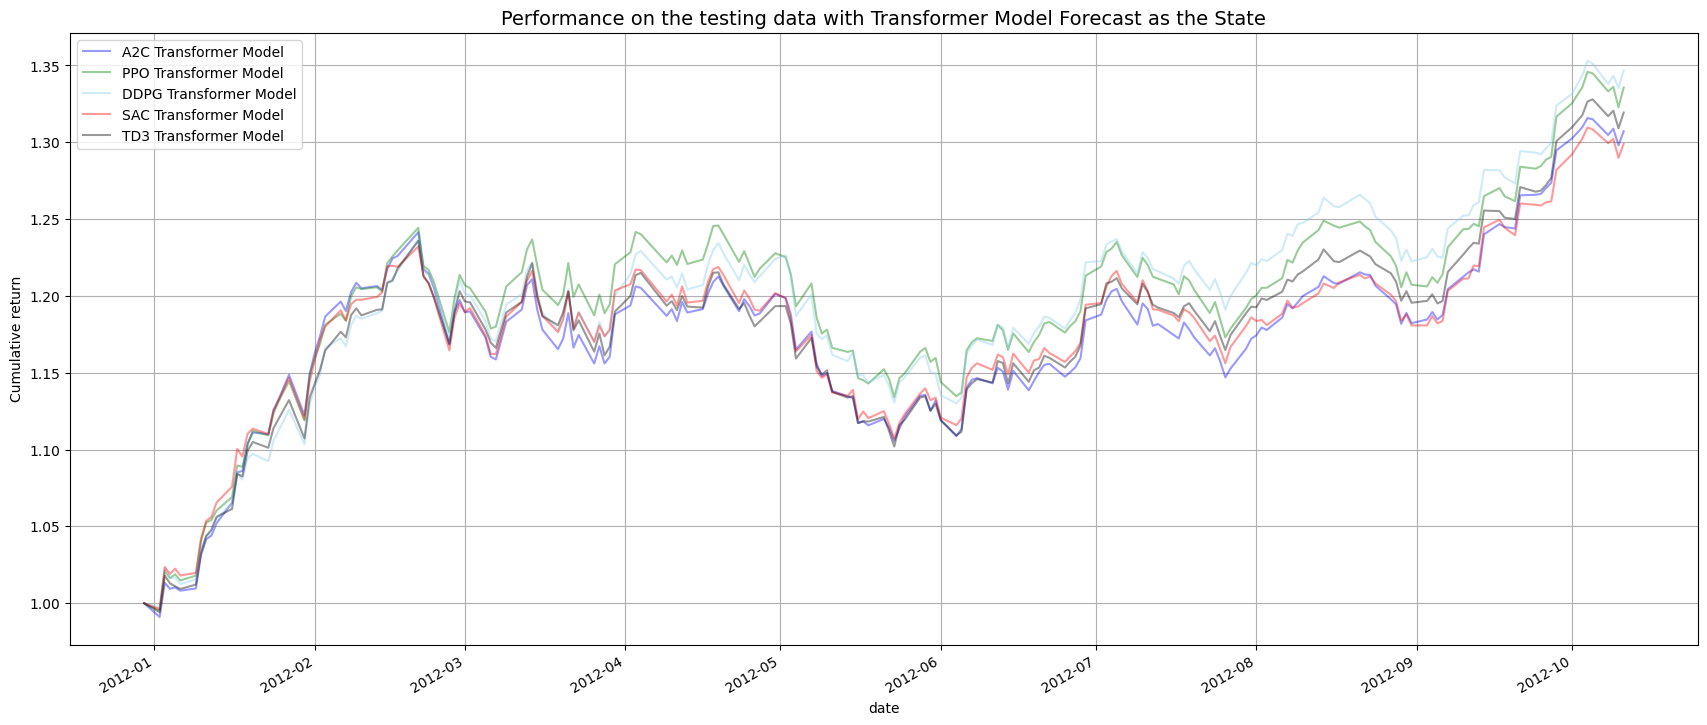

In [ ]:
%matplotlib inline
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(21,9))
a2c_test_cum_returns_transformer.plot(ax=ax, color='blue', alpha=.4)
ppo_test_cum_returns_transformer.plot(ax=ax, color='green', alpha=.4)
ddpg_test_cum_returns_transformer.plot(ax=ax, color='skyblue', alpha=.4)
sac_test_cum_returns_transformer.plot(ax=ax, color='red', alpha=0.4)
td3_test_cum_returns_transformer.plot(ax=ax, color='black', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("Cumulative return");
ax.set_title("Performance on the testing data with Transformer Model Forecast as the State", fontsize=14);

<hr style='border:2px solid black'>